- To plot the light curves of artificial shapes for different Limb Darkening Coefficients
- Plot 3 shapes and their lightcurves single LDCs (overlap)
- To plot the difference between two lightcurves
- Code to generate BATMAN Light curve
- Plot light curves of circles with different sizes

In [1]:
# check whether this ipynb is already running
a = 10
print(a)

10


Code to plot the light curves of artificial shapes for different Limb Darkening Coefficients

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# train_lc_dir =  '../../data/train/npy/lc/lc_1_shape_5.npy'
# train_lc = np.load(train_lc_dir)
# train_lc[0].shape[0]
# train_lc.shape[0]

In [ ]:
train_lc_dir =  '../../data/train/npy/lc/lc_1_shape_5.npy'
train_lc = np.load(train_lc_dir)
same_shape_diff_LDC_lc = np.zeros((9,train_lc[0].shape[0]))
del train_lc

for i in np.arange(1,10,1):
    train_lc_dir =  f'../../data/train/npy/lc/lc_{i}_shape_5.npy'
    train_lc = np.load(train_lc_dir)
    same_shape_diff_LDC_lc[i-1] = train_lc[0]
    del train_lc


In [ ]:
# 2. Normalize the lightcurves
## - Train Set
train_lc = np.copy(same_shape_diff_LDC_lc)
del same_shape_diff_LDC_lc
train_lc_scaled = np.zeros(train_lc.shape)
for i in np.arange(len(train_lc_scaled)):
    train_lc_scaled[i] = (train_lc[i] - np.amin(train_lc[i]))/(np.amax(train_lc[i]) - np.amin(train_lc[i]))


In [ ]:
# Add flat line towards left and right of dip
# 10 data points on each side
# 3. Extend the lightcurves
## - Train Set
train_lc_scaled_append = np.ones((train_lc.shape[0],120))
print('train_lc_scaled_append.shape = ',train_lc_scaled_append.shape)
print("len(train_lc_scaled_append[0,10:110]) = ",len(train_lc_scaled_append[0,10:110]))

for i in np.arange(len(train_lc_scaled)):
    train_lc_scaled_append[i,10:110] = train_lc_scaled[i]

In [ ]:
plt.rcParams['figure.dpi'] = 400

# Verification
# Plot - Train LCs
fig, ax = plt.subplots()
ph_simul = np.linspace(-1,1,len(train_lc_scaled_append[0]))
for i in np.arange(0,9,1):
    ax.plot(ph_simul, train_lc_scaled_append[i],linewidth='1.5')
plt.grid('on')
plt.show()

In [ ]:
ph_simul = np.linspace(-1,1,len(train_lc_scaled_append[0]))
plt.plot(ph_simul, train_lc_scaled_append[8],linewidth='1.5')
plt.plot(ph_simul, train_lc_scaled_append[7],linewidth='1.5')

plt.grid('on')
plt.show()


Plot 3 shapes and their lightcurves single LDCs (overlap)

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
train_lc_dir =  '../../data/train/npy/lc/lc_1_shape_5.npy'
train_lc = np.load(train_lc_dir)

# 2. Normalize the lightcurves
train_lc_scaled = np.zeros(train_lc.shape)
for i in np.arange(len(train_lc_scaled)):
    train_lc_scaled[i] = (train_lc[i] - np.amin(train_lc[i]))/(np.amax(train_lc[i]) - np.amin(train_lc[i]))

# Add flat line towards left and right of dip
# 10 data points on each side
# 3. Extend the lightcurves
## - Train Set
train_lc_scaled_append = np.ones((train_lc.shape[0],120))
print('train_lc_scaled_append.shape = ',train_lc_scaled_append.shape)
print("len(train_lc_scaled_append[0,10:110]) = ",len(train_lc_scaled_append[0,10:110]))

for i in np.arange(len(train_lc_scaled)):
    train_lc_scaled_append[i,10:110] = train_lc_scaled[i]

In [ ]:
train_shape_dir = '../../data/train/npy/shape/shape_5.npy'
train_shape = np.load(train_shape_dir)

# 2. Normalize the image, convert to opacity map
## Train Set
train_shape = train_shape/np.amax(train_shape)
train_shape_where_0 = np.where(train_shape == 0)
train_shape_where_1 = np.where(train_shape == 1)
train_shape[train_shape_where_0] = 1  # 1 represent the shape (1 opacity)
train_shape[train_shape_where_1] = 0  # 0 represent background (0 opacity)

In [ ]:
k = np.random.randint(0, len(train_lc_scaled_append)-1, 3)
ph_simul = np.linspace(-1,1,len(train_lc_scaled_append[0]))
plt.rcParams['figure.dpi'] = 400

# Create Figure 1
plt.subplot(2, 3, 1)
# plt.text(0.5, 0.5, 'Figure 1', ha='center', va='center', fontsize=12, color='black')
plt.imshow(train_shape[k[0]],cmap='inferno')
plt.title('Red')
plt.axis('off')

# Create Figure 2
plt.subplot(2, 3, 2)
# plt.text(0.5, 0.5, 'Figure 2', ha='center', va='center', fontsize=12, color='black')
plt.imshow(train_shape[k[1]],cmap='inferno')
plt.title('Blue')
plt.axis('off')

# Create Figure 3
plt.subplot(2, 3, 3)
# plt.text(0.5, 0.5, 'Figure 3', ha='center', va='center', fontsize=12, color='black')
plt.imshow(train_shape[k[2]],cmap='inferno')
plt.title('Green')
plt.axis('off')

# Create a single figure in the second row
plt.subplot(2, 1, 2)
# plt.text(0.5, 0.5, 'Single Figure', ha='center', va='center', fontsize=12, color='black')
plt.plot(ph_simul,train_lc_scaled_append[k[0]],color='tab:red')
plt.plot(ph_simul,train_lc_scaled_append[k[1]],color='tab:blue')
plt.plot(ph_simul,train_lc_scaled_append[k[2]],color='tab:green')
plt.grid('on')
plt.title('Transit Light Curves')
plt.ylabel('Flux')
plt.xlabel('Phase (arbitary units)')
# plt.axis('off')

# Adjust layout to make sure there is no overlapping
plt.tight_layout()

# Show the plot
plt.show()

**To plot the difference between two lightcurves**


**Load BATMAN lightcurve**

This code is used to plot the diversity of planet light curve


In [1]:
import batman
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.dpi'] = 400


In [2]:
import matplotlib.cm as cm  # Import colormap module for gradient


/tmp/ipykernel_228716/765297720.py:32: RuntimeWarning: invalid value encountered in true_divide
  batman_flux_scaled = (batman_flux - np.amin(batman_flux))/(np.amax(batman_flux) - np.amin(batman_flux))


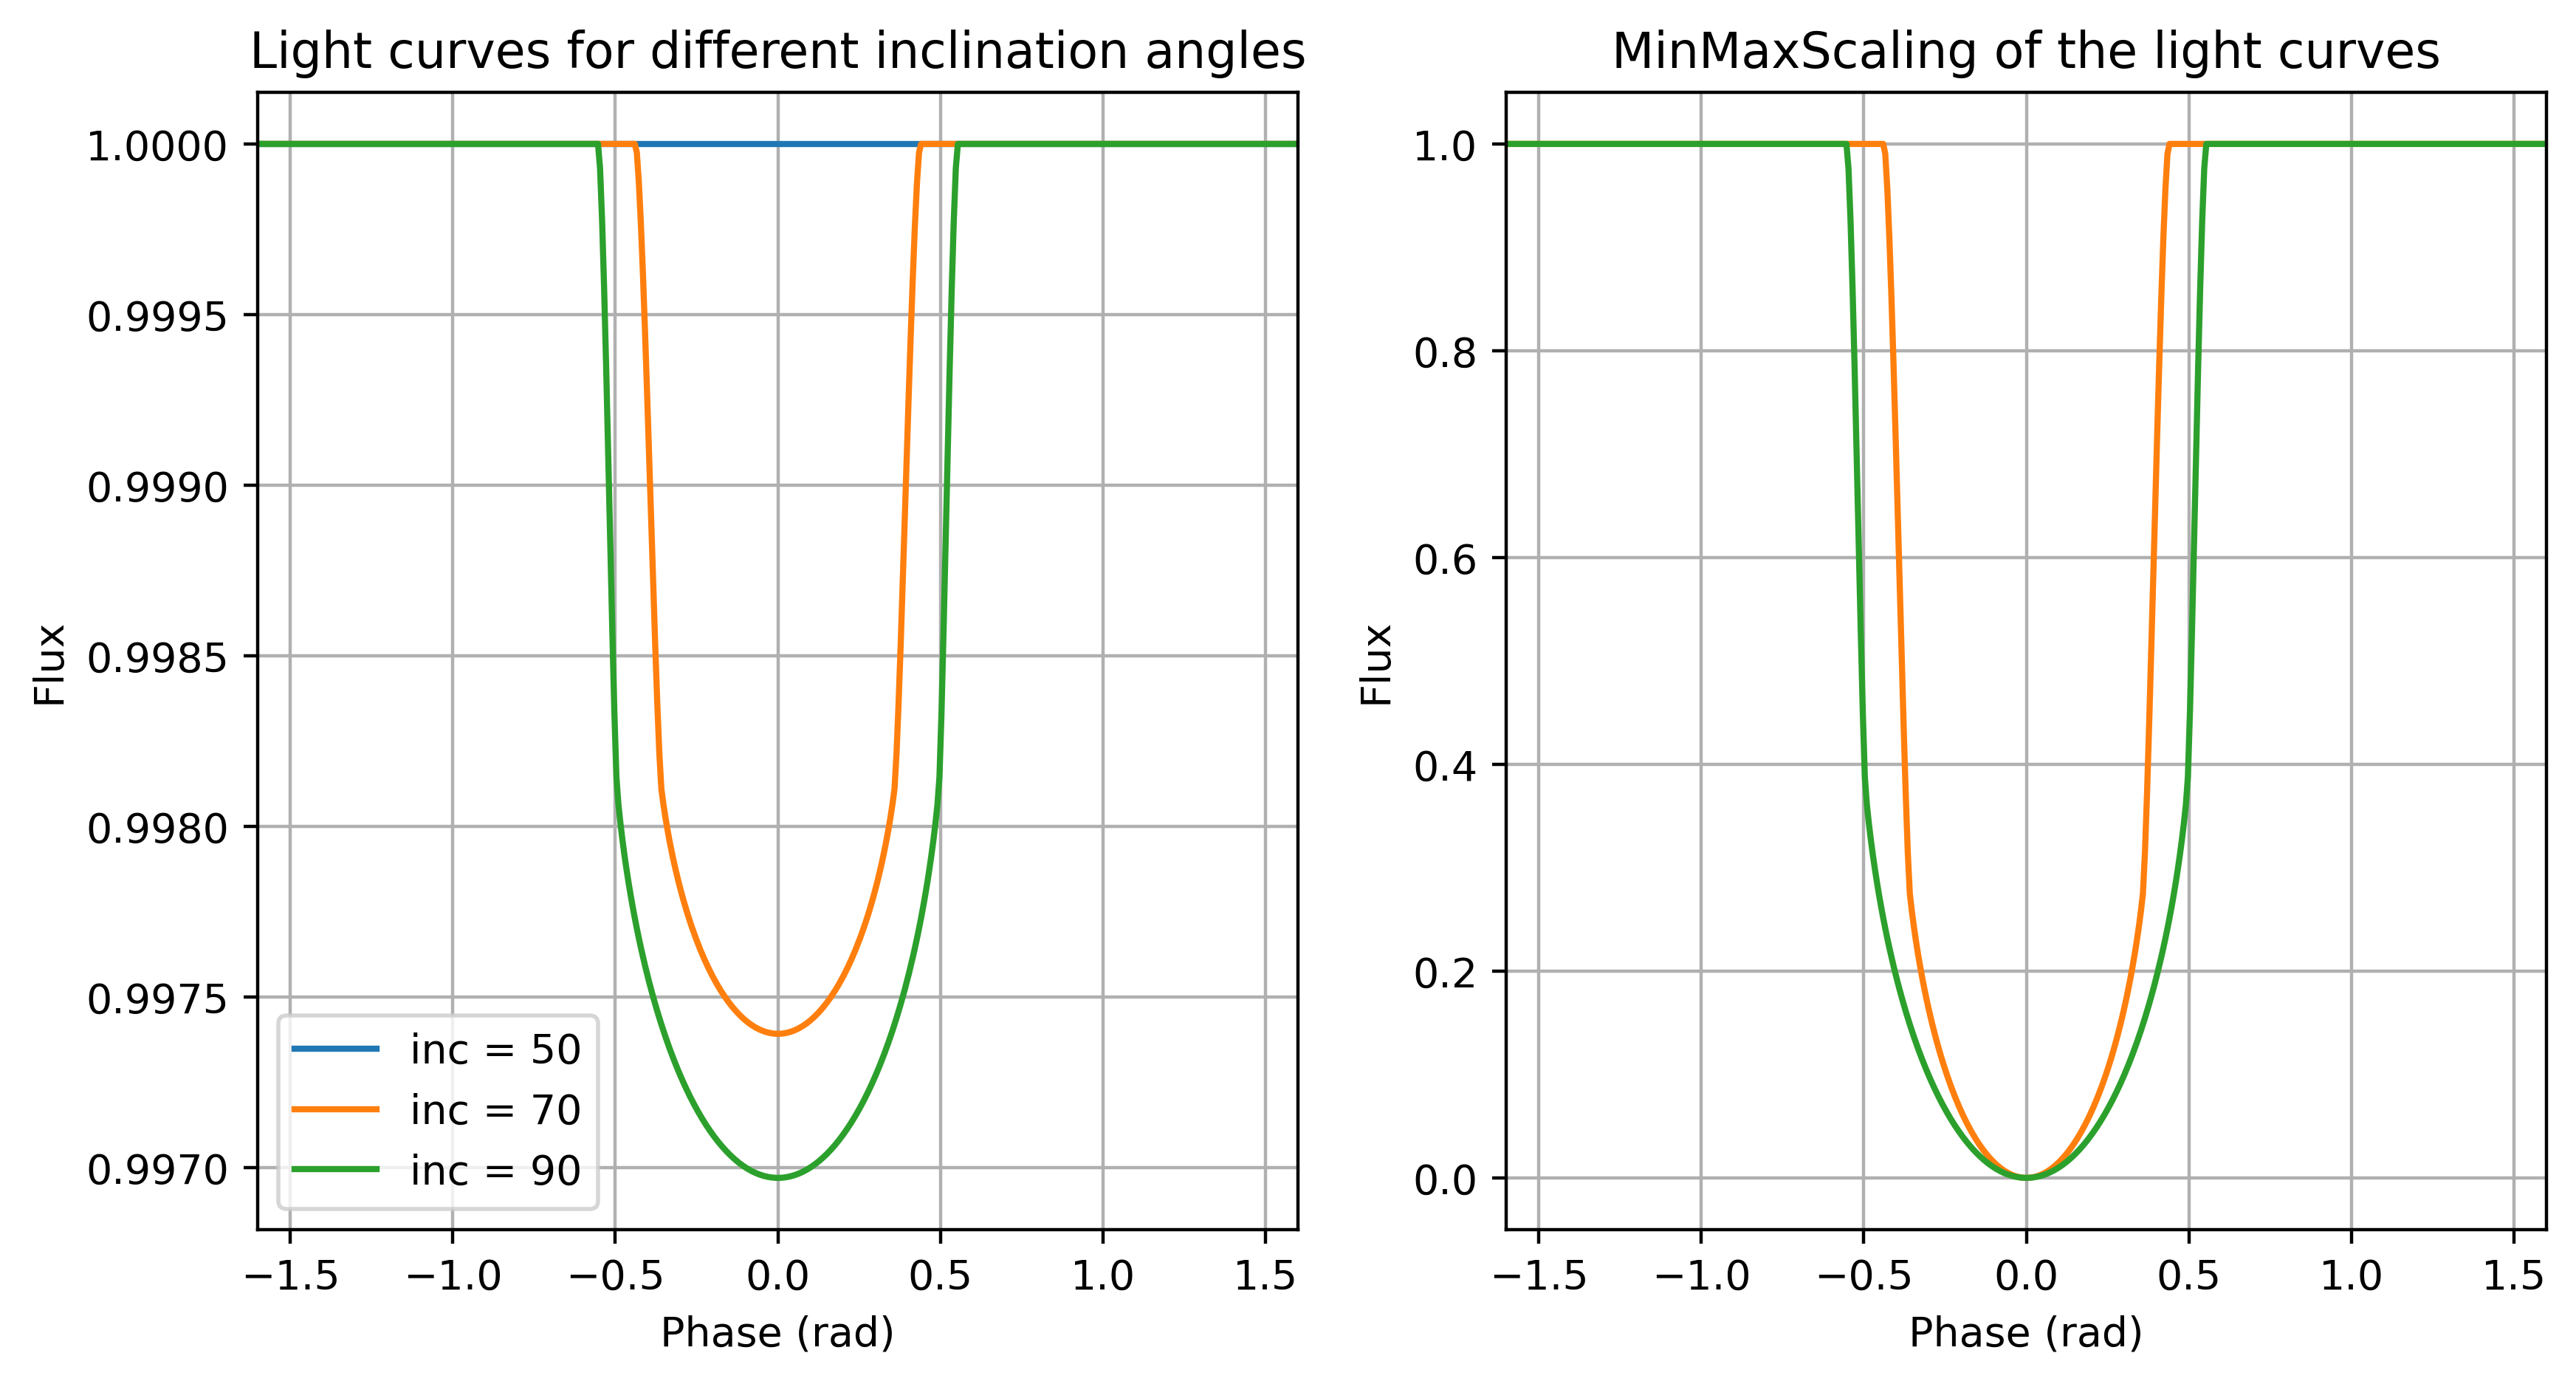

In [3]:
# Light curves for different inclination angle
fig, ax = plt.subplots(1,2,figsize=(10,5))
for inc in np.arange(50,110,20):
    r_planet = 0.05 # np.round(r_planet,1)
    Period = 1
    inc = np.round(inc,1)

    params = batman.TransitParams()       #object to store transit parameters
    params.t0 = 0.                        #time of inferior conjunction
    params.per = Period # 1.                       #orbital period
    params.rp = r_planet # 0.2                      #planet radius (in units of stellar radii)
    params.a = 2.                        #semi-major axis (in units of stellar radii)
    params.inc = inc # 90.                      #orbital inclination (in degrees)
    params.ecc = 0.                      #eccentricity
    params.w = 0.                        #longitude of periastron (in degrees)
    params.limb_dark = "quadratic"        #limb darkening model
    params.u = [0.5, 0.05]      #limb darkening coefficients [u1, u2, u3, u4]

    t = np.linspace(-Period, Period, 1999)  #times at which to calculate light curve
    m = batman.TransitModel(params, t)    #initializes model

    batman_flux = m.light_curve(params)                    #calculates light curve
    ax[0].plot(t*2*np.pi/(Period),batman_flux,label = f"inc = {inc}")
    ax[0].grid('on')
    ax[0].set_xlabel("Phase (rad)")
    ax[0].set_ylabel("Flux")
    ax[0].set_title("Light curves for different inclination angles")
    ax[0].set_xlim(-1.6,1.6)
    ax[0].legend()
    # MinMaxScaling light curve
    batman_flux_scaled = np.copy(batman_flux)
    batman_flux_scaled = (batman_flux - np.amin(batman_flux))/(np.amax(batman_flux) - np.amin(batman_flux))

    batman_phase = t*2*np.pi/(Period)
    ax[1].set_xlim(-1.6,1.6)
    ax[1].plot(batman_phase,batman_flux_scaled)
    ax[1].grid('on')
    ax[1].set_xlabel("Phase (rad)")
    ax[1].set_ylabel("Flux")
    ax[1].set_title("MinMaxScaling of the light curves")

plt.show()

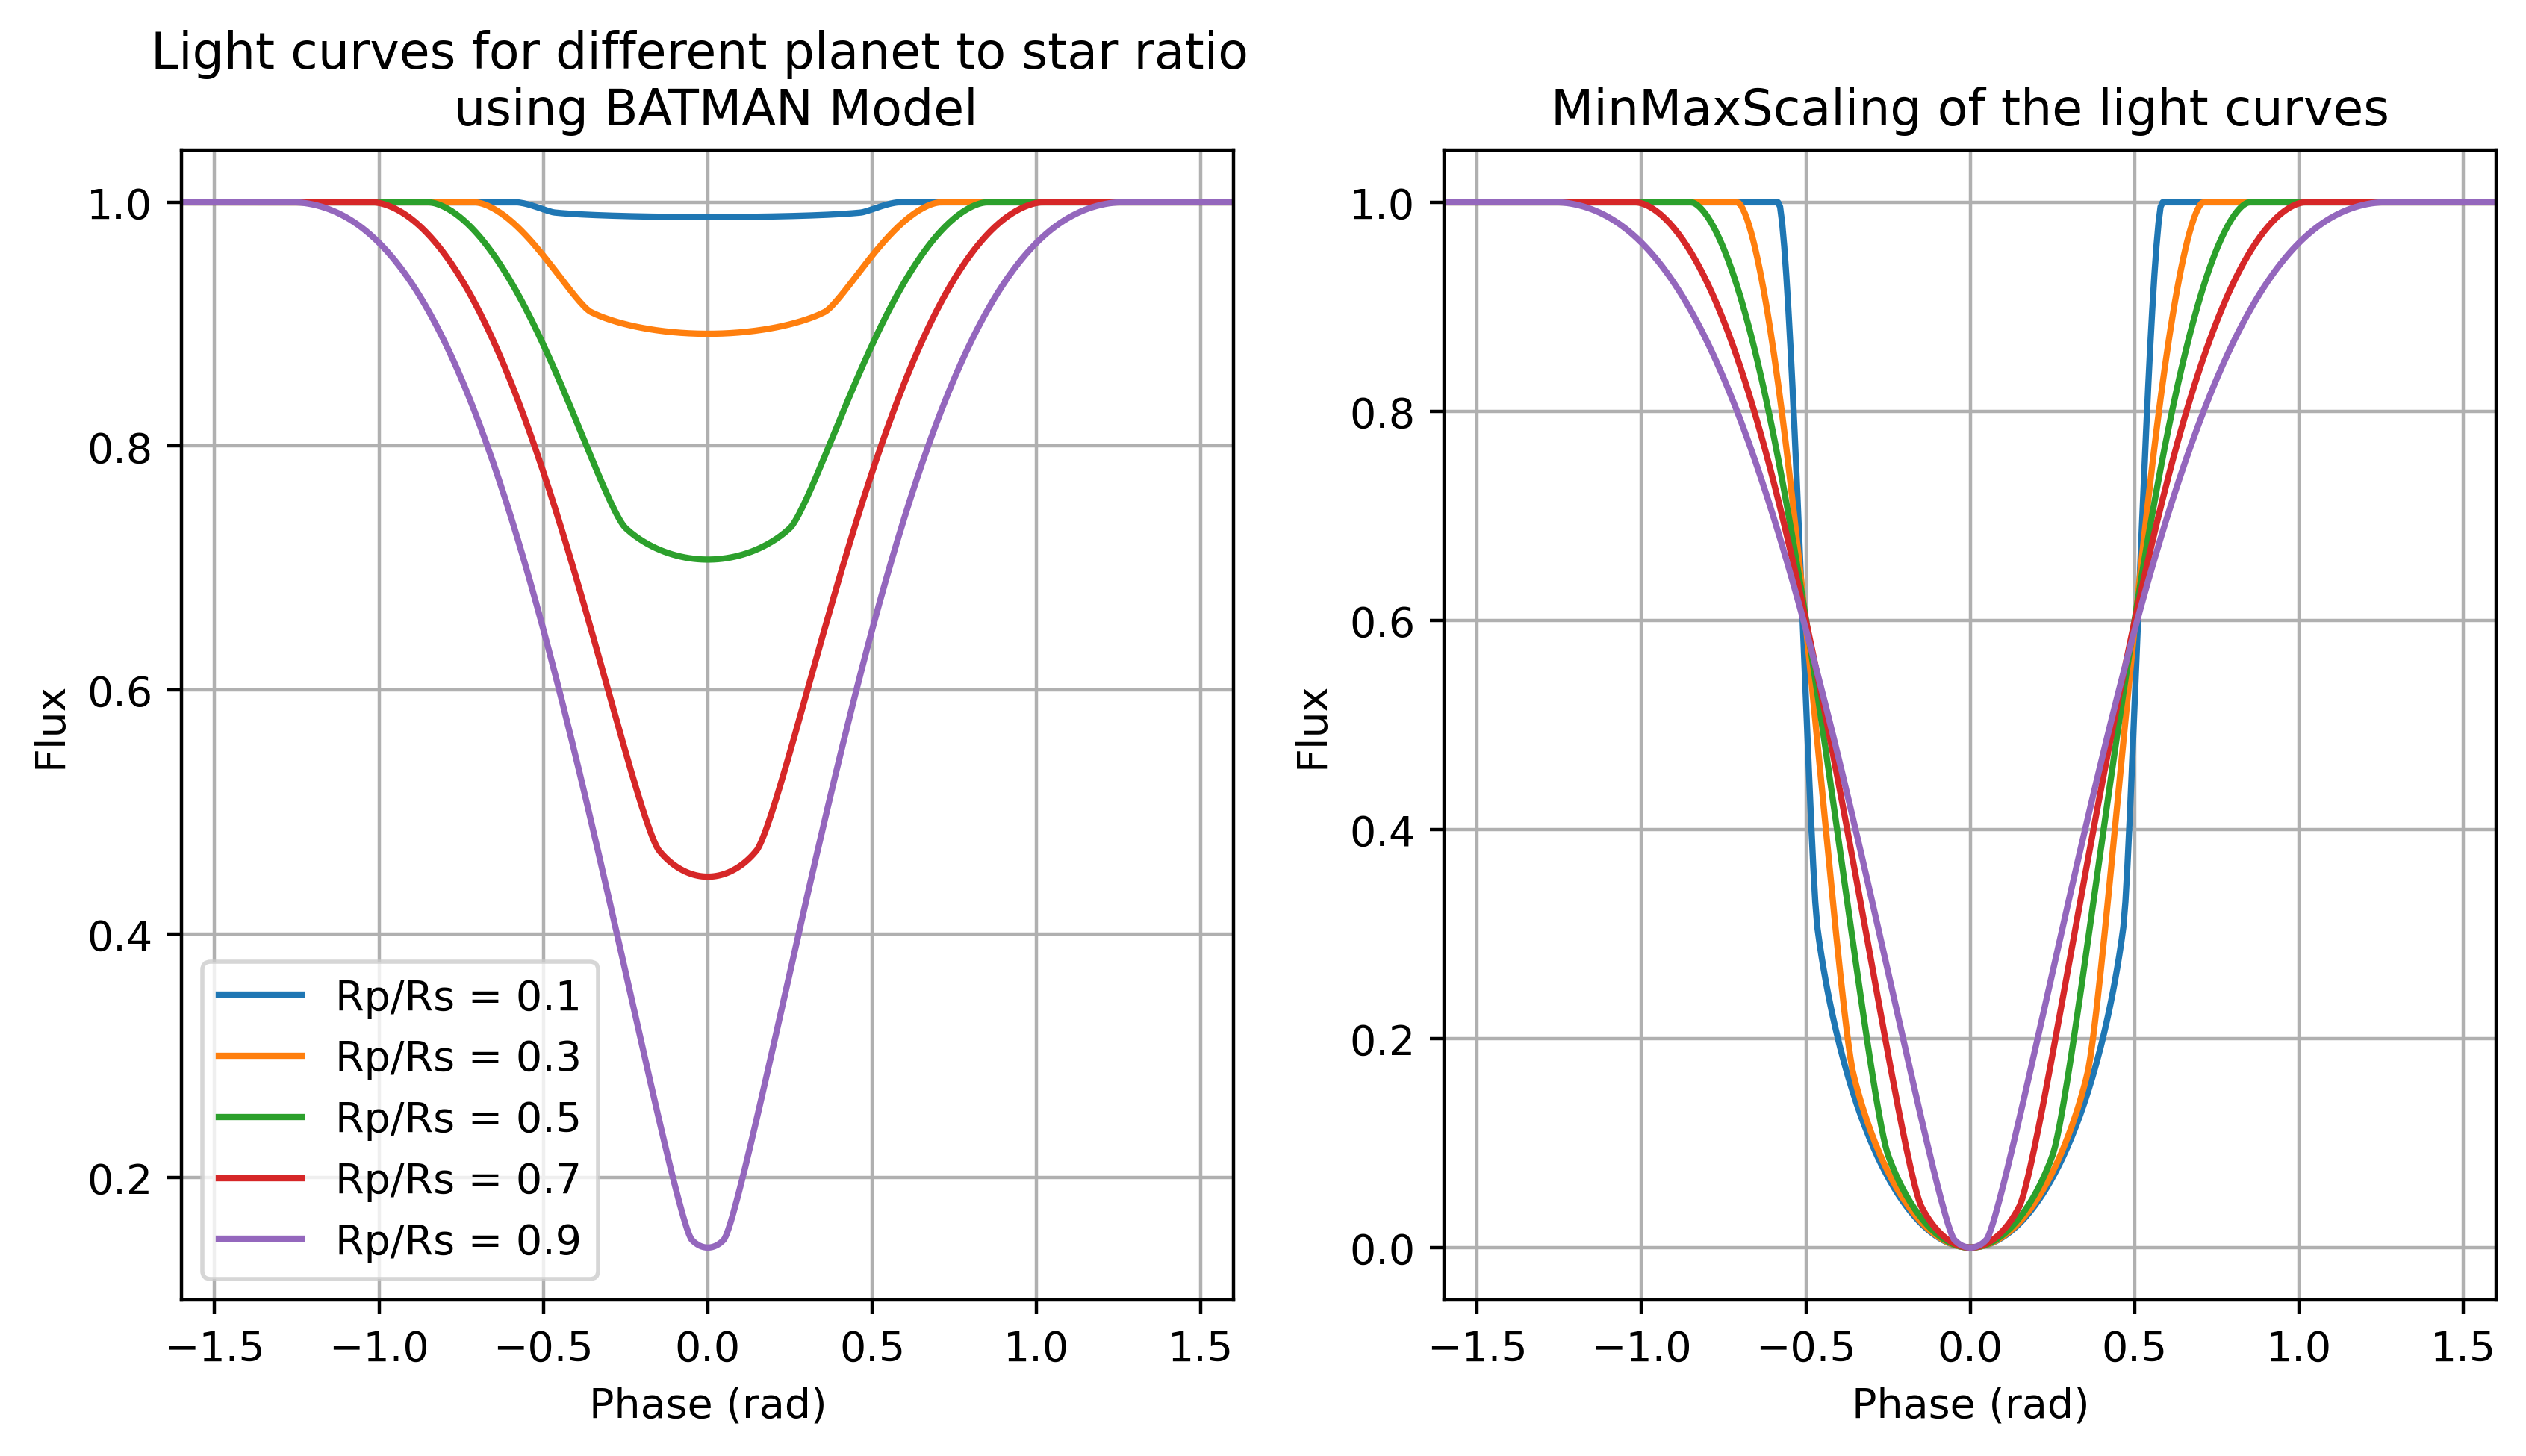

In [4]:
# Light curves for different planet to star ratio \n using BATMAN Model
fig, ax = plt.subplots(1,2,figsize=(10,5))
for r_planet in np.arange(0.1,1.1,0.2):
    r_planet = np.round(r_planet,1)
    Period = 1
    
    params = batman.TransitParams()       #object to store transit parameters
    params.t0 = 0.                        #time of inferior conjunction
    params.per = Period # 1.                       #orbital period
    params.rp = r_planet # 0.2                      #planet radius (in units of stellar radii)
    params.a = 2.                        #semi-major axis (in units of stellar radii)
    params.inc = 90.                      #orbital inclination (in degrees)
    params.ecc = 0.                      #eccentricity
    params.w = 0.                        #longitude of periastron (in degrees)
    params.limb_dark = "quadratic"        #limb darkening model
    params.u = [0.5, 0.05]      #limb darkening coefficients [u1, u2, u3, u4]

    t = np.linspace(-Period, Period, 1999)  #times at which to calculate light curve
    m = batman.TransitModel(params, t)    #initializes model

    batman_flux = m.light_curve(params)                    #calculates light curve
    ax[0].plot(t*2*np.pi/(Period),batman_flux,label = f"Rp/Rs = {r_planet}")
    ax[0].grid('on')
    ax[0].set_xlabel("Phase (rad)")
    ax[0].set_ylabel("Flux")
    ax[0].set_title("Light curves for different planet to star ratio \n using BATMAN Model")
    ax[0].set_xlim(-1.6,1.6)
    ax[0].legend()
    # MinMaxScaling light curve
    batman_flux_scaled = np.copy(batman_flux)
    batman_flux_scaled = (batman_flux - np.amin(batman_flux))/(np.amax(batman_flux) - np.amin(batman_flux))

    batman_phase = t*2*np.pi/(Period)
    ax[1].set_xlim(-1.6,1.6)
    ax[1].plot(batman_phase,batman_flux_scaled)
    ax[1].grid('on')
    ax[1].set_xlabel("Phase (rad)")
    ax[1].set_ylabel("Flux")
    ax[1].set_title("MinMaxScaling of the light curves")

plt.show()

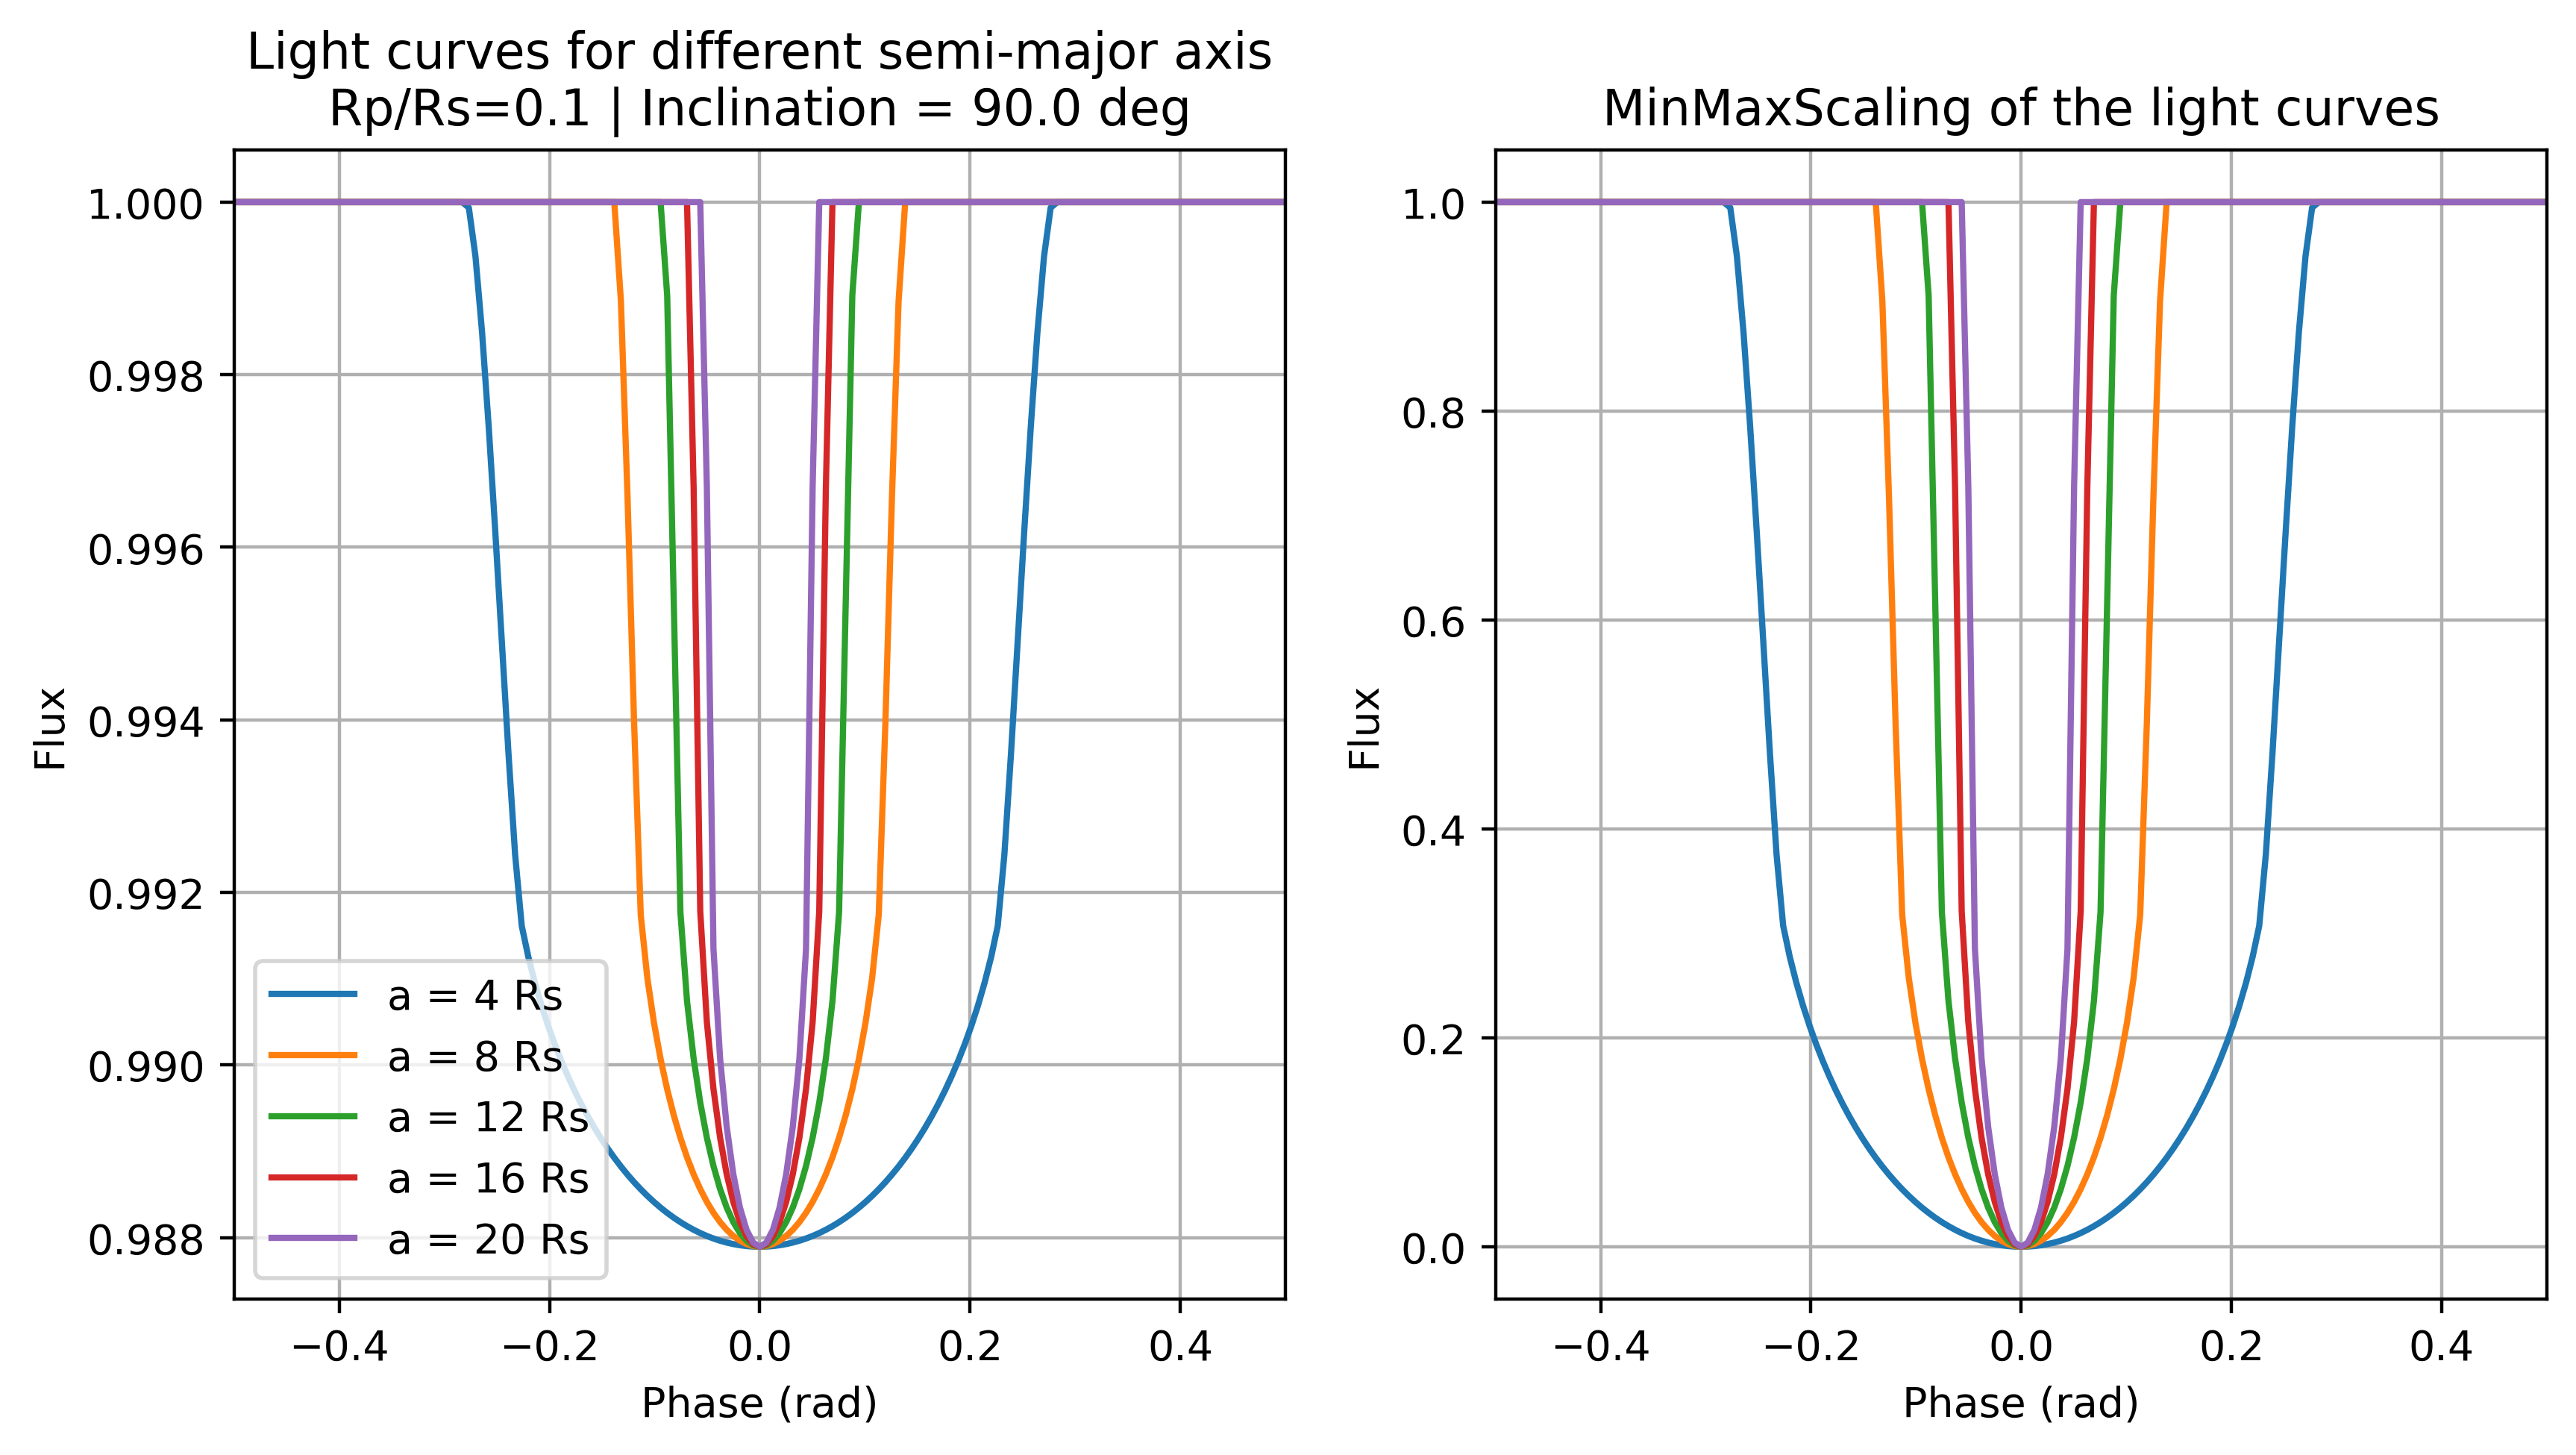

In [10]:
# Light curves for different semimajor axis (in units of stellar radii)

fig, ax = plt.subplots(1,2,figsize=(10,5))
for a in np.arange(4,24,4):
    r_planet = 0.1
    Period = 1
    inclination = 90.0

    params = batman.TransitParams()       #object to store transit parameters
    params.t0 = 0.                        #time of inferior conjunction
    params.per = Period                      #orbital period
    params.rp = r_planet #0.2                      #planet radius (in units of stellar radii)
    params.a = a                         #semi-major axis (in units of stellar radii)
    params.inc = inclination #90.                      #orbital inclination (in degrees)
    params.ecc = 0.                      #eccentricity
    params.w = 0.                        #longitude of periastron (in degrees)
    params.limb_dark = "quadratic"        #limb darkening model
    params.u = [0.5, 0.05]      #limb darkening coefficients [u1, u2, u3, u4]

    t = np.linspace(-Period, Period, 1999)  #times at which to calculate light curve
    m = batman.TransitModel(params, t)    #initializes model

    batman_flux = m.light_curve(params)                    #calculates light curve
    ax[0].plot(t*2*np.pi/(Period),batman_flux,label = f"a = {a} Rs")
    ax[0].grid('on')
    ax[0].set_xlabel("Phase (rad)")
    ax[0].set_ylabel("Flux")
    ax[0].set_title(f"Light curves for different semi-major axis\nRp/Rs={r_planet} | Inclination = {inclination} deg")
    ax[0].set_xlim(-0.5,0.5)
    ax[0].legend(loc = 'lower left')
    ax[0].ticklabel_format(axis='both', style='plain', useOffset=False)

    # MinMaxScaling of the light curves
    batman_flux_scaled = np.copy(batman_flux)
    batman_flux_scaled = (batman_flux - np.amin(batman_flux))/(np.amax(batman_flux) - np.amin(batman_flux))

    batman_phase = t*2*np.pi/(Period)
    ax[1].set_xlim(-0.5,0.5)
    ax[1].plot(batman_phase,batman_flux_scaled)
    ax[1].grid('on')
    ax[1].set_xlabel("Phase (rad)")
    ax[1].set_ylabel("Flux")
    ax[1].set_title("MinMaxScaling of the light curves")


plt.show()

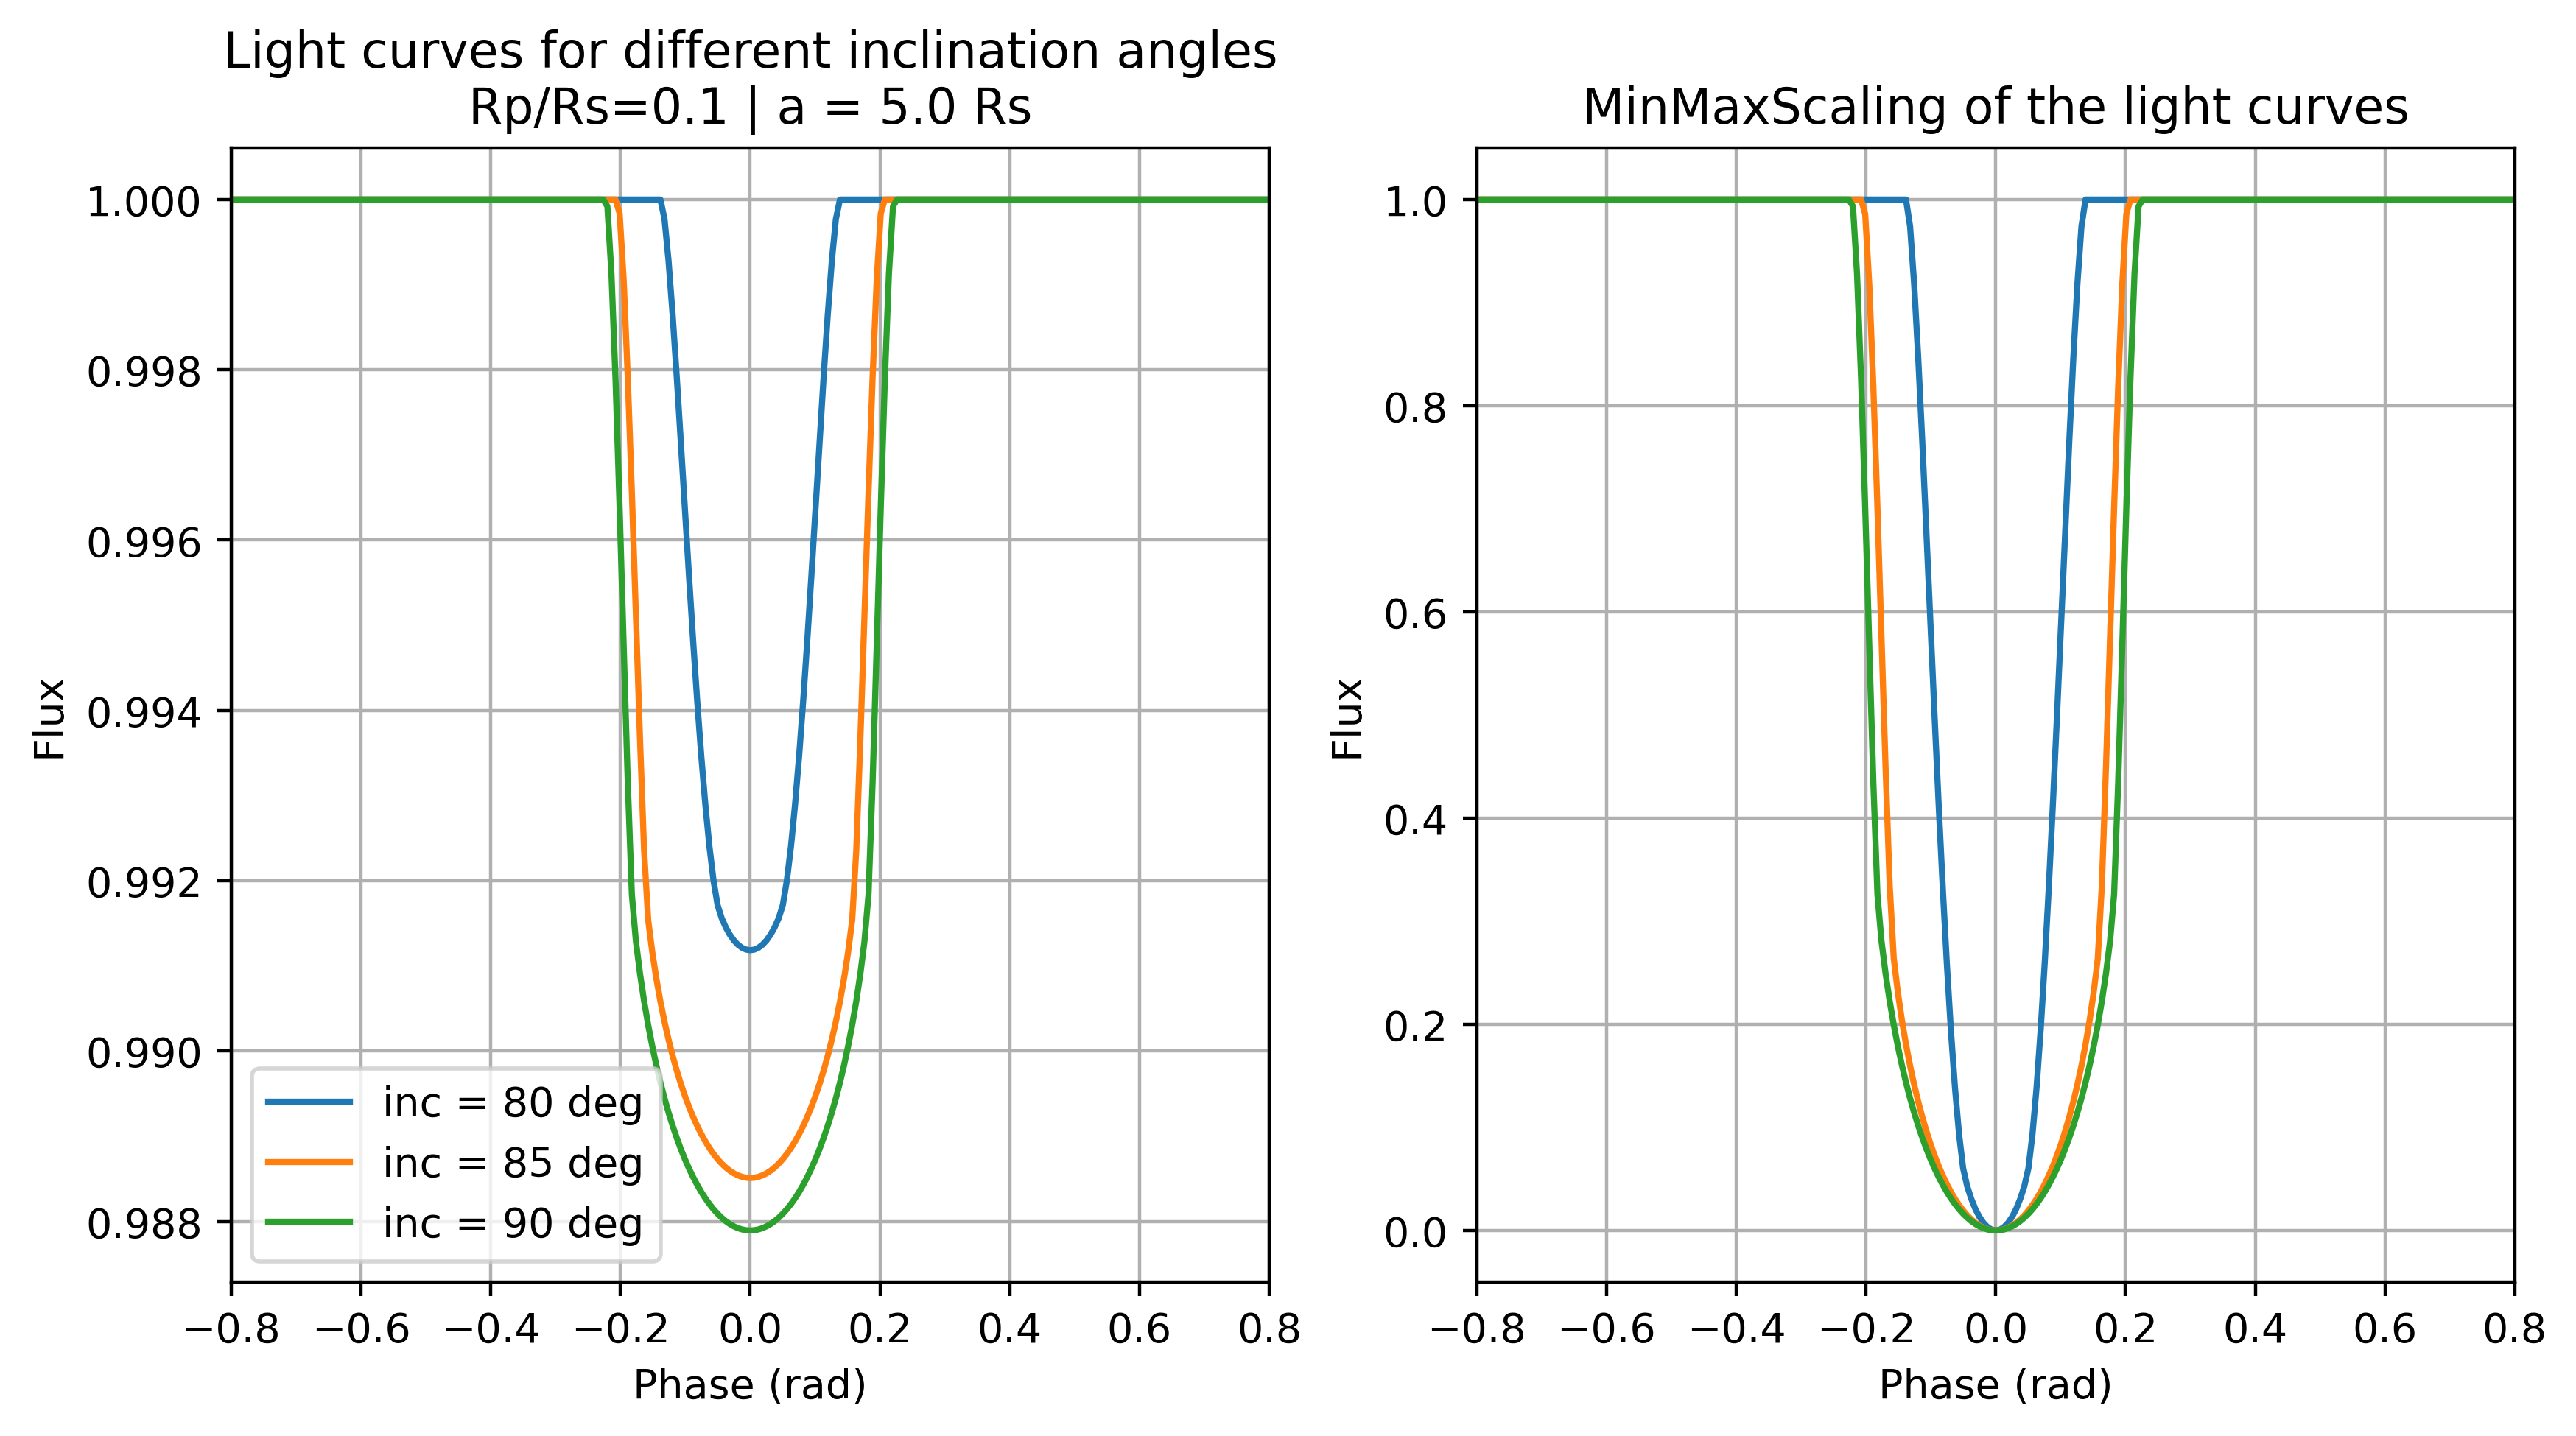

In [31]:
# Light curves for different orbital inclination angle

fig, ax = plt.subplots(1,2,figsize=(10,5))
for inclination in np.array([80,85,90]):
    r_planet = 0.1
    Period = 1.0
    inclination = np.round(inclination)
    a = 5.0

    params = batman.TransitParams()       #object to store transit parameters
    params.t0 = 0.                        #time of inferior conjunction
    params.per = Period                      #orbital period
    params.rp = r_planet #0.2                      #planet radius (in units of stellar radii)
    params.a = a                         #semi-major axis (in units of stellar radii)
    params.inc = inclination # 90.                      #orbital inclination (in degrees)
    params.ecc = 0.                      #eccentricity
    params.w = 90.                        #longitude of periastron (in degrees)
    params.limb_dark = "quadratic"        #limb darkening model
    params.u = [0.5, 0.05]      #limb darkening coefficients [u1, u2, u3, u4]

    t = np.linspace(-Period, Period, 1999)  #times at which to calculate light curve
    m = batman.TransitModel(params, t)    #initializes model

    batman_flux = m.light_curve(params)                    #calculates light curve
    ax[0].plot(t*2*np.pi/(Period),batman_flux,label = f"inc = {inclination} deg")
    ax[0].grid('on')
    ax[0].set_xlabel("Phase (rad)")
    ax[0].set_ylabel("Flux")
    ax[0].set_title(f"Light curves for different inclination angles\nRp/Rs={r_planet} | a = {a} Rs")
    ax[0].set_xlim(-0.8,0.8)
    ax[0].legend(loc = 'lower left')
    # MinMaxScaling of the light curves
    batman_flux_scaled = np.copy(batman_flux)
    batman_flux_scaled = (batman_flux - np.amin(batman_flux))/(np.amax(batman_flux) - np.amin(batman_flux))

    batman_phase = t*2*np.pi/(Period)
    ax[1].set_xlim(-0.8,0.8)
    ax[1].plot(batman_phase,batman_flux_scaled)
    ax[1].grid('on')
    ax[1].set_xlabel("Phase (rad)")
    ax[1].set_ylabel("Flux")
    ax[1].set_title("MinMaxScaling of the light curves")



plt.show()

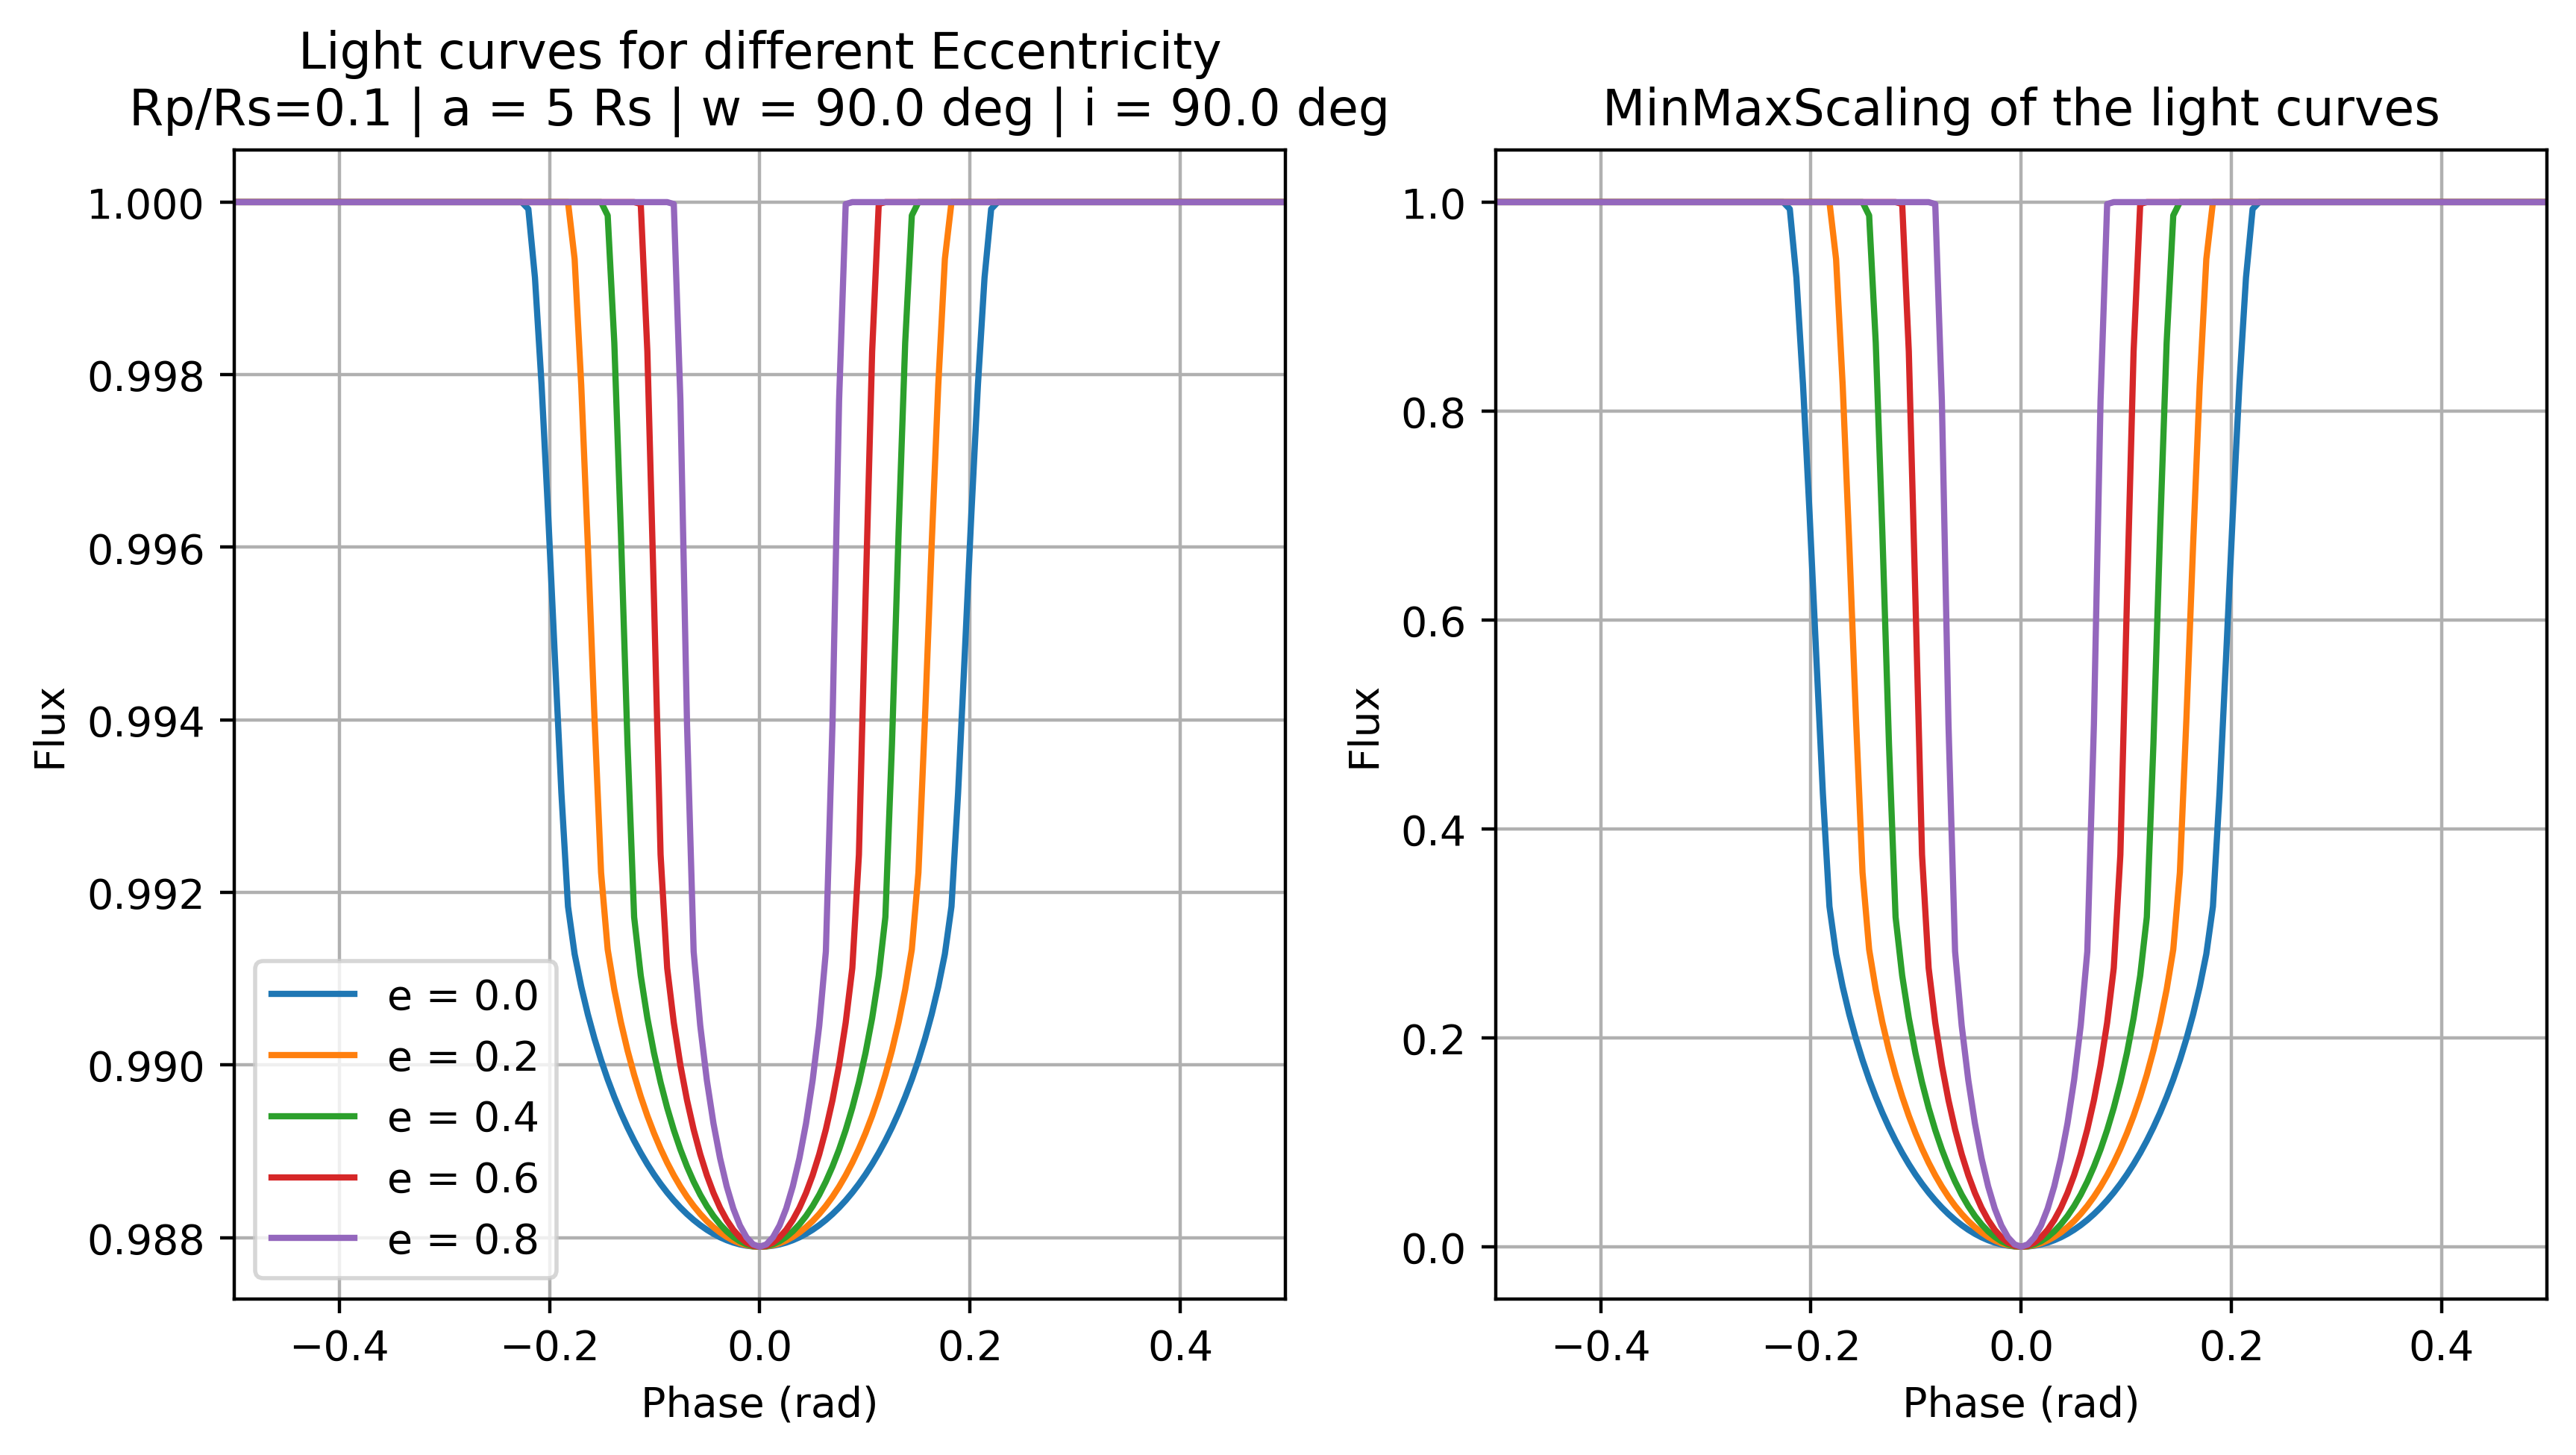

In [43]:
# Light curves for different eccentricty
fig, ax = plt.subplots(1,2,figsize=(10,5))
for eccentricity in np.arange(0.0,1.0,0.2):
    r_planet = 0.1
    Period = 1
    inclination =  90.0 # rng.integers(70,90) # roughly angle of oribit wrt sky
    a = 5
    ecc = np.round(eccentricity,2)
    w_long_periastron = 90.0 # rng.integers(0,90) # roughly angle of transit axis with horizontal

    

    params = batman.TransitParams()       #object to store transit parameters
    params.t0 = 0.                        #time of inferior conjunction
    params.per = Period                      #orbital period
    params.rp = r_planet #0.2                      #planet radius (in units of stellar radii)
    params.a = a                         #semi-major axis (in units of stellar radii)
    params.inc = inclination                      #orbital inclination (in degrees)
    params.ecc = ecc                      #eccentricity
    params.w = w_long_periastron                       #longitude of periastron (in degrees)
    params.limb_dark = "quadratic"        #limb darkening model
    params.u = [0.5, 0.05]      #limb darkening coefficients [u1, u2, u3, u4]

    t = np.linspace(-Period, Period, 1999)  #times at which to calculate light curve
    m = batman.TransitModel(params, t)    #initializes model

    batman_flux = m.light_curve(params)                    #calculates light curve
    # ax[0].plot(t*2*np.pi/(Period),batman_flux,label = f"e = {ecc} | w = {w_long_periastron} | i = {inclination}")
    ax[0].plot(t*2*np.pi/(Period),batman_flux,label = f"e = {ecc}")
    ax[0].grid('on')
    ax[0].set_xlabel("Phase (rad)")
    ax[0].set_ylabel("Flux")
    ax[0].set_title(f"Light curves for different Eccentricity\nRp/Rs={r_planet} | a = {a} Rs | w = {w_long_periastron} deg | i = {inclination} deg")
    ax[0].set_xlim(-0.5,0.5)
    ax[0].legend(loc = 'lower left')
    # MinMaxScaling of the light curves
    batman_flux_scaled = np.copy(batman_flux)
    batman_flux_scaled = (batman_flux - np.amin(batman_flux))/(np.amax(batman_flux) - np.amin(batman_flux))

    batman_phase = t*2*np.pi/(Period)
    ax[1].set_xlim(-0.5,0.5)
    ax[1].plot(batman_phase,batman_flux_scaled)
    ax[1].grid('on')
    ax[1].set_xlabel("Phase (rad)")
    ax[1].set_ylabel("Flux")
    ax[1].set_title("MinMaxScaling of the light curves")



plt.show()

In [45]:
from matplotlib.colors import Normalize

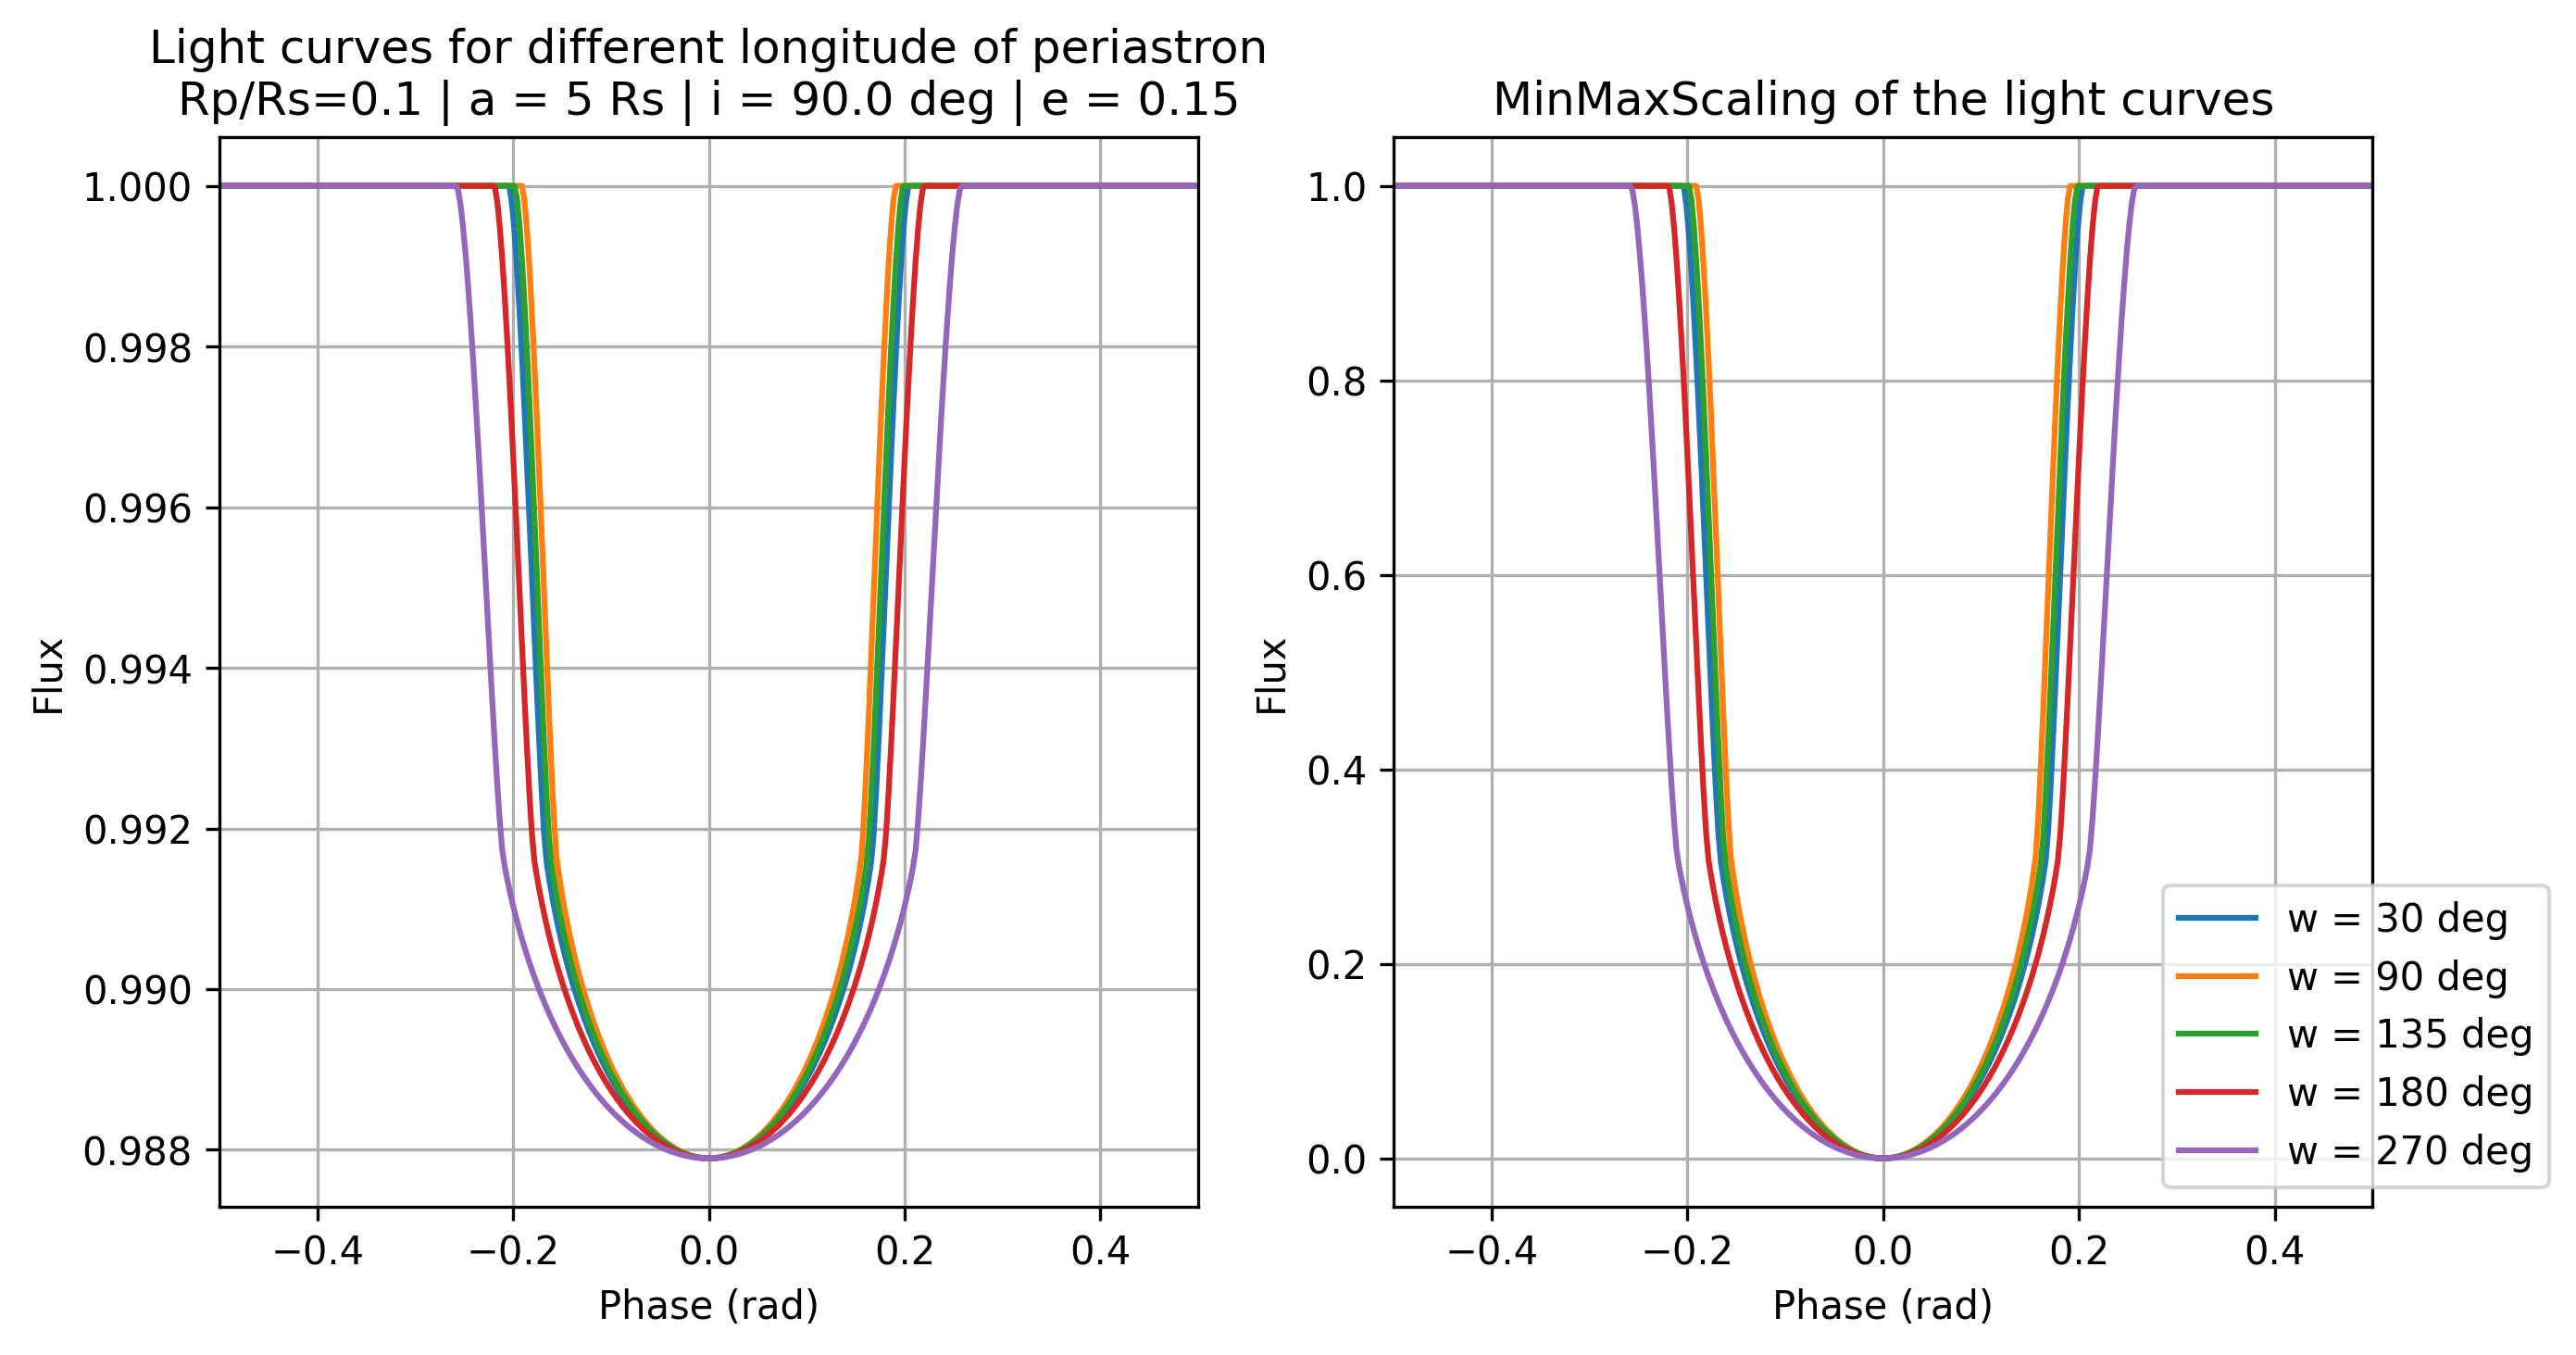

In [50]:
# rng = np.random.default_rng()

# Light curves for different longitude of periastron
fig, ax = plt.subplots(1,2,figsize=(10,5),dpi=300)

w_long_periastron_array = np.array([30,90,135,180,270])

# cmap = cm.get_cmap('plasma')  # Choose a colormap (e.g., 'viridis', 'plasma', 'inferno')
# norm = Normalize(vmin=min(w_long_periastron_array), vmax=max(w_long_periastron_array))  # Normalize w_long_periastron values
# color = cmap(norm(w_long_periastron_array))  # Map w_long_periastron to a color

i = 0
for w_long_periastron in w_long_periastron_array:

    r_planet = 0.1
    Period = 1.
    inclination =  90. # rng.integers(70,90) # roughly angle of oribit wrt sky
    a = 5
    ecc = 0.15 # np.round((rng.integers(0,9))/10,2) # 0.4 # np.round(eccentricity,2)
    w_long_periastron = np.round(w_long_periastron,1) # 0 roughly angle of transit axis with horizontal
    

    params = batman.TransitParams()       #object to store transit parameters
    params.t0 = 0.                        #time of inferior conjunction
    params.per = Period                      #orbital period
    params.rp = r_planet #0.2                      #planet radius (in units of stellar radii)
    params.a = a                         #semi-major axis (in units of stellar radii)
    params.inc = inclination                      #orbital inclination (in degrees)
    params.ecc = ecc                      #eccentricity
    params.w = w_long_periastron                       #longitude of periastron (in degrees)
    params.limb_dark = "quadratic"        #limb darkening model
    params.u = [0.5, 0.05]      #limb darkening coefficients [u1, u2, u3, u4]

    t = np.linspace(-Period, Period, 4999)  #times at which to calculate light curve
    m = batman.TransitModel(params, t)    #initializes model




    batman_flux = m.light_curve(params)                    #calculates light curve
    # ax[0].plot(t*2*np.pi/(Period),batman_flux,label = f"e = {ecc} | w = {w_long_periastron} | i = {inclination}")
    ax[0].plot(t*2*np.pi/(Period),batman_flux,label = f"w = {w_long_periastron} deg")
    ax[0].grid('on')
    ax[0].set_xlabel("Phase (rad)")
    ax[0].set_ylabel("Flux")
    ax[0].set_title(f"Light curves for different longitude of periastron\nRp/Rs={r_planet} | a = {a} Rs | i = {inclination} deg | e = {ecc}")
    ax[0].set_xlim(-0.5,0.5)
    # ax[0].legend(bbox_to_anchor=(1.2, 0),loc = 'lower right')
    # MinMaxScaling of the light curves
    batman_flux_scaled = np.copy(batman_flux)
    batman_flux_scaled = (batman_flux - np.amin(batman_flux))/(np.amax(batman_flux) - np.amin(batman_flux))



    batman_phase = t*2*np.pi/(Period)
    ax[1].set_xlim(-0.5,0.5)
    ax[1].plot(batman_phase,batman_flux_scaled,label = f"w = {w_long_periastron} deg")
    ax[1].grid('on')
    ax[1].set_xlabel("Phase (rad)")
    ax[1].set_ylabel("Flux")
    ax[1].legend(bbox_to_anchor=(1.2, 0),loc = 'lower right')
    ax[1].set_title("MinMaxScaling of the light curves")
    i+=1


plt.show()

In [ ]:
## This for a combination r_planet and a
# fig, ax = plt.subplots(2,1,figsize=(5,10))
# for r_planet in np.arange(0.1,1.1,0.1):
#     for a in np.arange(4,24,2):
#         r_planet = np.round(r_planet,1)
#         Period = 1
        
#         params = batman.TransitParams()       #object to store transit parameters
#         params.t0 = 0.                        #time of inferior conjunction
#         params.per = Period                      #orbital period
#         params.rp = r_planet #0.2                      #planet radius (in units of stellar radii)
#         params.a = a                         #semi-major axis (in units of stellar radii)
#         params.inc = 90.                      #orbital inclination (in degrees)
#         params.ecc = 0.                      #eccentricity
#         params.w = 0.                        #longitude of periastron (in degrees)
#         params.limb_dark = "quadratic"        #limb darkening model
#         params.u = [0.5, 0.05]      #limb darkening coefficients [u1, u2, u3, u4]

#         t = np.linspace(-Period, Period, 1999)  #times at which to calculate light curve
#         m = batman.TransitModel(params, t)    #initializes model

#         batman_flux = m.light_curve(params)                    #calculates light curve
#         ax[0].plot(t*2*np.pi/(Period),batman_flux,label = f"a = {a}")
#         ax[0].grid('on')
#         ax[0].set_xlabel("Phase (rad)")
#         ax[0].set_ylabel("Flux")
#         ax[0].set_title(r"Planet light curves for different semi-major axis (BATMAN) $R_{p} = 0.2 * R_{s}$")
#         ax[0].set_xlim(-0.5,0.5)
#         # ax[0].legend()
#         # Normalize light curve
#         batman_flux_scaled = np.copy(batman_flux)
#         batman_flux_scaled = (batman_flux - np.amin(batman_flux))/(np.amax(batman_flux) - np.amin(batman_flux))

#         batman_phase = t*2*np.pi/(Period)
#         ax[1].set_xlim(-0.5,0.5)
#         ax[1].plot(batman_phase,batman_flux_scaled)
#         ax[1].grid('on')
#         ax[1].set_xlabel("Phase (rad)")
#         ax[1].set_ylabel("Flux")
#         ax[1].set_title("Planet light curves after apply minmax scaling")

    

# plt.show()

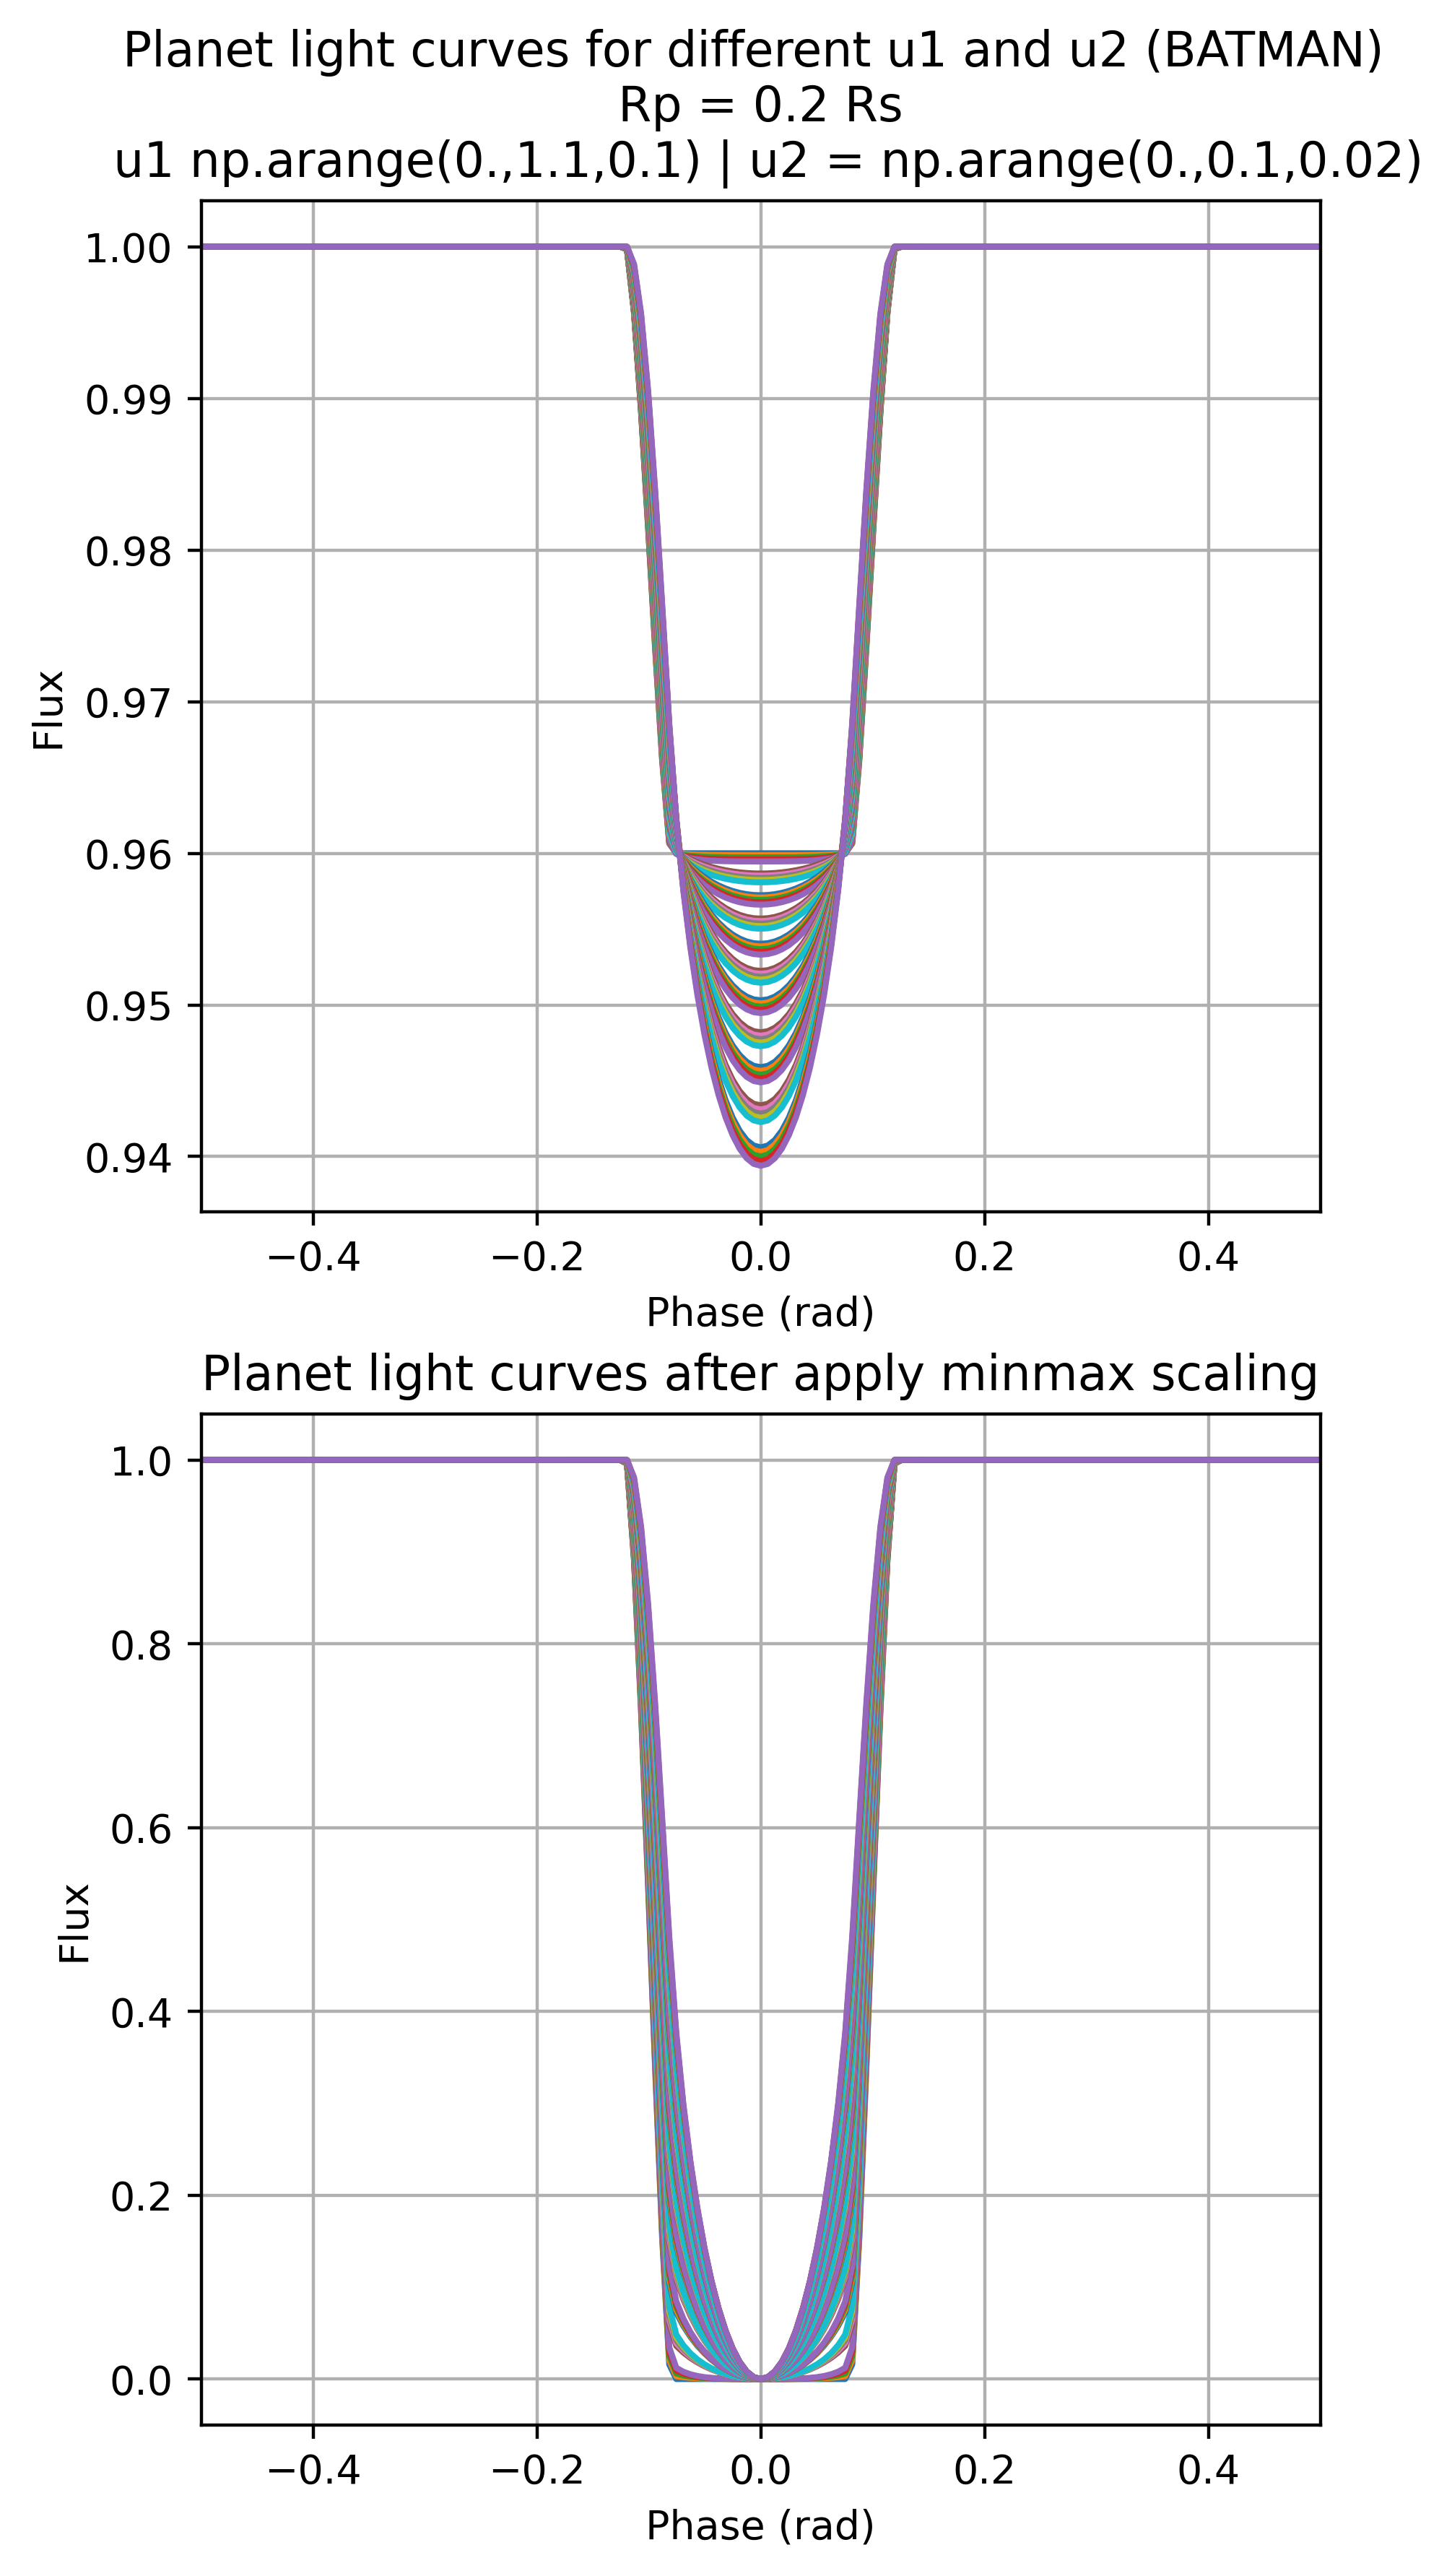

In [6]:
# Combination of u1 and u2 (run in colab not here)
fig, ax = plt.subplots(2,1,figsize=(5,10))
for u1 in np.arange(0.,1.1,0.1):
    for u2 in np.arange(0.,0.1,0.02):
        u1 = np.around(u1,2)
        u2 = np.around(u2,2)
        r_planet = 0.2
        Period = 1
        a = 10

        params = batman.TransitParams()       #object to store transit parameters
        params.t0 = 0.                        #time of inferior conjunction
        params.per = Period                      #orbital period
        params.rp = r_planet #0.2                      #planet radius (in units of stellar radii)
        params.a = a                         #semi-major axis (in units of stellar radii)
        params.inc = 90.                      #orbital inclination (in degrees)
        params.ecc = 0.                      #eccentricity
        params.w = 0.                        #longitude of periastron (in degrees)
        params.limb_dark = "quadratic"        #limb darkening model
        params.u = [u1, u2]      #limb darkening coefficients [u1, u2, u3, u4]

        t = np.linspace(-Period, Period, 1999)  #times at which to calculate light curve
        m = batman.TransitModel(params, t)    #initializes model

        batman_flux = m.light_curve(params)                    #calculates light curve
        ax[0].plot(t*2*np.pi/(Period),batman_flux,label = f"u1={u1},u2={u2}")
        ax[0].grid('on')
        ax[0].set_xlabel("Phase (rad)")
        ax[0].set_ylabel("Flux")
        ax[0].set_title("Planet light curves for different u1 and u2 (BATMAN) \n Rp = 0.2 Rs \n u1 np.arange(0.,1.1,0.1) | u2 = np.arange(0.,0.1,0.02)")
        ax[0].set_xlim(-0.5,0.5)
                # Normalize light curve
        batman_flux_scaled = np.copy(batman_flux)
        batman_flux_scaled = (batman_flux - np.amin(batman_flux))/(np.amax(batman_flux) - np.amin(batman_flux))

        batman_phase = t*2*np.pi/(Period)
        ax[1].set_xlim(-0.5,0.5)
        ax[1].plot(batman_phase,batman_flux_scaled,label = f"u1={u1},u2={u2}")
        ax[1].grid('on')
        ax[1].set_xlabel("Phase (rad)")
        ax[1].set_ylabel("Flux")
        ax[1].set_title("Planet light curves after apply minmax scaling")
        # ax[1].legend()



plt.show()

In [ ]:
## Combination of r_planet, a, u1, u2 (use colab for running)
# fig, ax = plt.subplots(2,1,figsize=(5,10))

# for r_planet in np.arange(0.1,1.1,0.1):
#     for a in np.arange(4.,24.,2.):
#         for u1 in np.arange(0.,1.1,0.1):
#             for u2 in np.arange(0.,0.11,0.01):
#                 u1 = np.around(u1,2)
#                 u2 = np.around(u2,2)
#                 r_planet = np.around(r_planet,2)
#                 a = np.around(a,2)
#                 Period = 1

#                 params = batman.TransitParams()       #object to store transit parameters
#                 params.t0 = 0.                        #time of inferior conjunction
#                 params.per = Period                      #orbital period
#                 params.rp = r_planet #0.2                      #planet radius (in units of stellar radii)
#                 params.a = a                         #semi-major axis (in units of stellar radii)
#                 params.inc = 90.                      #orbital inclination (in degrees)
#                 params.ecc = 0.                      #eccentricity
#                 params.w = 0.                        #longitude of periastron (in degrees)
#                 params.limb_dark = "quadratic"        #limb darkening model
#                 params.u = [u1, u2]      #limb darkening coefficients [u1, u2, u3, u4]

#                 t = np.linspace(-Period, Period, 1999)  #times at which to calculate light curve
#                 m = batman.TransitModel(params, t)    #initializes model

#                 batman_flux = m.light_curve(params)                    #calculates light curve
#                 ax[0].plot(t*2*np.pi/(Period),batman_flux,label = f"u1={u1},u2={u2}")
#                 ax[0].grid('on')
#                 ax[0].set_xlabel("Phase (rad)")
#                 ax[0].set_ylabel("Flux")
#                 ax[0].set_title("Planet light curves for different u1 and u2 (BATMAN) \n Rp = 0.2 * Rs$")
#                 ax[0].set_xlim(-0.5,0.5)
#                         # Normalize light curve
#                 batman_flux_scaled = np.copy(batman_flux)
#                 batman_flux_scaled = (batman_flux - np.amin(batman_flux))/(np.amax(batman_flux) - np.amin(batman_flux))

#                 batman_phase = t*2*np.pi/(Period)
#                 ax[1].set_xlim(-0.5,0.5)
#                 ax[1].plot(batman_phase,batman_flux_scaled,label = f"u1={u1},u2={u2}")
#                 ax[1].grid('on')
#                 ax[1].set_xlabel("Phase (rad)")
#                 ax[1].set_ylabel("Flux")
#                 ax[1].set_title("Planet light curves after apply minmax scaling")
#                 # ax[1].legend()
     
# plt.show()
                

In [ ]:
fig, ax = plt.subplots(2,1,figsize=(5,10))
for r_planet in np.arange(0.1,1.1,0.1):
    r_planet = 0.2
    Period = 1
    
    params = batman.TransitParams()       #object to store transit parameters
    params.t0 = 0.                        #time of inferior conjunction
    params.per = Period # 1.                       #orbital period
    params.rp = r_planet # 0.2                      #planet radius (in units of stellar radii)
    params.a = 2.                        #semi-major axis (in units of stellar radii)
    params.inc = 90.                      #orbital inclination (in degrees)
    params.ecc = 0.                      #eccentricity
    params.w = 0.                        #longitude of periastron (in degrees)
    params.limb_dark = "quadratic"        #limb darkening model
    params.u = [0.5, 0.05]      #limb darkening coefficients [u1, u2, u3, u4]

    t = np.linspace(-Period, Period, 1999)  #times at which to calculate light curve
    m = batman.TransitModel(params, t)    #initializes model

    batman_flux = m.light_curve(params)                    #calculates light curve
    ax[0].plot(t*2*np.pi/(Period),batman_flux,label = f"Rp = {r_planet} Rs")
    ax[0].grid('on')
    ax[0].set_xlabel("Phase (rad)")
    ax[0].set_ylabel("Flux")
    ax[0].set_title("Planet light curves for different sizes (BATMAN)")
    ax[0].set_xlim(-1.6,1.6)
    ax[0].legend()
    # Normalize light curve
    batman_flux_scaled = np.copy(batman_flux)
    batman_flux_scaled = (batman_flux - np.amin(batman_flux))/(np.amax(batman_flux) - np.amin(batman_flux))

    batman_phase = t*2*np.pi/(Period)
    ax[1].set_xlim(-1.6,1.6)
    ax[1].plot(batman_phase,batman_flux_scaled)
    ax[1].grid('on')
    ax[1].set_xlabel("Phase (rad)")
    ax[1].set_ylabel("Flux")
    ax[1].set_title("Planet light curves after apply minmax scaling")

plt.show()

In [ ]:
for r_planet in np.arange(0.1,0.9,0.1):
    params = batman.TransitParams()       #object to store transit parameters
    params.t0 = 0.                        #time of inferior conjunction
    params.per = 1.                       #orbital period
    params.rp = r_planet # 0.2                      #planet radius (in units of stellar radii)
    params.a = 20.                        #semi-major axis (in units of stellar radii)
    params.inc = 90.                      #orbital inclination (in degrees)
    params.ecc = 0.                      #eccentricity
    params.w = 45.                        #longitude of periastron (in degrees)
    params.limb_dark = "quadratic"        #limb darkening model
    params.u = [0.5, 0]      #limb darkening coefficients [u1, u2, u3, u4]

    t = np.linspace(-0.015, 0.015, 1999)  #times at which to calculate light curve
    m = batman.TransitModel(params, t)    #initializes model

    batman_flux = m.light_curve(params)                    #calculates light curve

    # Normalize light curve
    batman_flux_scaled = np.copy(batman_flux)
    batman_flux_scaled = (batman_flux - np.amin(batman_flux))/(np.amax(batman_flux) - np.amin(batman_flux))

    batman_phase = np.linspace(-0.015,0.015,len(batman_flux_scaled))
    plt.plot(batman_phase,batman_flux_scaled)
    plt.grid('on')

plt.show()

In [ ]:
for u1_planet in np.arange(0.1,0.9,0.1):
    params = batman.TransitParams()       #object to store transit parameters
    params.t0 = 0.                        #time of inferior conjunction
    params.per = 1.                       #orbital period
    params.rp = 0.2                      #planet radius (in units of stellar radii)
    params.a = 20.                        #semi-major axis (in units of stellar radii)
    params.inc = 90.                      #orbital inclination (in degrees)
    params.ecc = 0.                      #eccentricity
    params.w = 45.                        #longitude of periastron (in degrees)
    params.limb_dark = "quadratic"        #limb darkening model
    params.u = [u1_planet, 0]      #limb darkening coefficients [u1, u2, u3, u4]

    t = np.linspace(-0.015, 0.015, 1999)  #times at which to calculate light curve
    m = batman.TransitModel(params, t)    #initializes model

    batman_flux = m.light_curve(params)                    #calculates light curve

    # Normalize light curve
    batman_flux_scaled = np.copy(batman_flux)
    batman_flux_scaled = (batman_flux - np.amin(batman_flux))/(np.amax(batman_flux) - np.amin(batman_flux))

    batman_phase = np.linspace(-0.015,0.015,len(batman_flux_scaled))
    plt.plot(batman_phase,batman_flux_scaled)
    plt.grid('on')

plt.show()

In [ ]:
for u2_planet in np.arange(0.1,0.9,0.1):
    params = batman.TransitParams()       #object to store transit parameters
    params.t0 = 0.                        #time of inferior conjunction
    params.per = 1.                       #orbital period
    params.rp = 0.2                      #planet radius (in units of stellar radii)
    params.a = 20.                        #semi-major axis (in units of stellar radii)
    params.inc = 90.                      #orbital inclination (in degrees)
    params.ecc = 0.                      #eccentricity
    params.w = 45.                        #longitude of periastron (in degrees)
    params.limb_dark = "quadratic"        #limb darkening model
    params.u = [0, u2_planet]      #limb darkening coefficients [u1, u2, u3, u4]

    t = np.linspace(-0.015, 0.015, 1999)  #times at which to calculate light curve
    m = batman.TransitModel(params, t)    #initializes model

    batman_flux = m.light_curve(params)                    #calculates light curve

    # Normalize light curve
    batman_flux_scaled = np.copy(batman_flux)
    batman_flux_scaled = (batman_flux - np.amin(batman_flux))/(np.amax(batman_flux) - np.amin(batman_flux))

    batman_phase = np.linspace(-0.015,0.015,len(batman_flux_scaled))
    plt.plot(batman_phase,batman_flux_scaled)
    plt.grid('on')

plt.show()

In [ ]:
# Cut light curve

# flux_scaled_mask used to select the flat part by certain percentage
batman_flux_scaled_mask = np.copy(batman_flux_scaled)

batman_flux_scaled_mask[batman_flux_scaled_mask>=0.98] = 1.0
batman_flux_scaled_mask[batman_flux_scaled_mask<0.98] = 0.0

print("Length of batman lc = ",len(batman_flux_scaled_mask))

count_zeros = np.count_nonzero(batman_flux_scaled_mask == 0)  

center_index = int(len(batman_flux_scaled)/2)
print("center_index = ",center_index)

left_index = int(center_index - int(count_zeros/2)-int(count_zeros/6)) 
right_index = int(center_index + int(count_zeros/2)+int(count_zeros/6))
print("left_index = ",left_index)
print("right_index = ",right_index)
batman_lc_test = batman_flux_scaled[left_index+8:right_index-8] # Cut light curve
print("Length of cut light curve: batman_lc_test = ",len(batman_lc_test))
plt.plot(np.linspace(-1,1,len(batman_lc_test)),batman_lc_test,label='Batman LC',color="tab:red")
# ax.scatter(np.linspace(-1,1,len(train_lc_scaled_append[0])),train_lc_scaled_append[0],label='Simulated LC',color="tab:red",s=1)

plt.grid('on')
plt.show()

Load 8bitTransit circle light curve (manual made using paintz)

In [ ]:
# 8bit_lc
# 1. Load Lightcurve Dataset
lc_dir = '/scratch/abraham/Documents/mega_git/mega/data/random/npy/lc/lc_1_14Feb2024_circle_38_38_px.npy'
test_lc = np.load(lc_dir)

# Normalize the lightcurves
## - Test Set
test_lc_scaled = np.zeros(test_lc.shape)
for i in np.arange(len(test_lc_scaled)):
    test_lc_scaled[i] = (test_lc[i] - np.amin(test_lc[i]))/(np.amax(test_lc[i]) - np.amin(test_lc[i]))

# Append with ones
## - Test Set
test_lc_scaled_append = np.ones((test_lc.shape[0],120))
for i in np.arange(len(test_lc_scaled)):
    test_lc_scaled_append[i,10:110] = test_lc_scaled[i]
print("Extended the light curves")

lc_8bit = test_lc_scaled_append[0]

plt.plot(np.linspace(-1,1,len(lc_8bit)),lc_8bit,label='8bit')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid('on')
plt.show()

**Cut the 8bit lc as was cut for BATMAN**

In [ ]:
# # Cut light curve

# # flux_scaled_mask used to select the flat part by certain percentage
# lc_8bit_scaled_mask = np.copy(lc_8bit)

# lc_8bit_scaled_mask[lc_8bit_scaled_mask>=0.98] = 1.0
# lc_8bit_scaled_mask[lc_8bit_scaled_mask<0.98] = 0.0

# print("Length of 8bit lc = ",len(lc_8bit_scaled_mask))

# count_zeros = np.count_nonzero(lc_8bit_scaled_mask == 0)  
# print("count_zeros of lc_8bit = ",count_zeros)
# center_index = int(len(lc_8bit)/2)
# print("center_index = ",center_index)

# left_index = int(center_index - int(count_zeros/2)-int(count_zeros/6)) 
# right_index = int(center_index + int(count_zeros/2)+int(count_zeros/6))
# print("left_index = ",left_index)
# print("right_index = ",right_index)
# lc_8bit_test = lc_8bit[left_index:right_index] # Cut light curve
# print("Length of cut light curve: lc_8bit_test = ",len(lc_8bit_test))
# plt.plot(np.linspace(-1,1,len(lc_8bit_test)),lc_8bit_test,label='8bit LC',color="tab:red")
# # ax.scatter(np.linspace(-1,1,len(train_lc_scaled_append[0])),train_lc_scaled_append[0],label='Simulated LC',color="tab:red",s=1)

# plt.grid('on')
# plt.show()

Plot the difference of both the light curve

In [ ]:
# Plot overlap of BATMAN and 8bit light curves
plt.plot(np.linspace(-1,1,len(batman_lc_test)),batman_lc_test,label='Batman LC',color="tab:red")
# plt.plot(np.linspace(-1,1,len(lc_8bit_test)),lc_8bit_test,label='8bit')
plt.plot(np.linspace(-1,1,len(lc_8bit)),lc_8bit,label='8bit')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.grid('on')
plt.show()

In [ ]:
# Downsample BATMAN light curve to match 8bit light curve's length
def down_sample(to_down_sample_lc):
        new_length = 120 # New length of that light curve array
        to_down_sample = to_down_sample_lc
        dwn_sample_idx = np.round(np.linspace(0, len(to_down_sample_lc) - 1, new_length)).astype(int)
        down_sample_lc = to_down_sample[dwn_sample_idx]
        return down_sample_lc

batman_lc_test_sampled = down_sample(batman_lc_test)
print('length = ',len(batman_lc_test_sampled))
plt.plot(np.linspace(-1,1,len(batman_lc_test_sampled)),batman_lc_test_sampled,label='batman',color='blue')

plt.plot(np.linspace(-1,1,len(lc_8bit)),lc_8bit,label='8bit (pixelated circle)',color='tab:red')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Flux")
plt.xlabel("Phase")
plt.grid('on')
plt.show()

In [ ]:
plt.title("Difference between light curves \n 8bit(pixelated circle) - BATMAN")
plt.plot(np.linspace(-1,1,len(lc_8bit)),lc_8bit-batman_lc_test_sampled,label='8bit - BATMAN')
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.ylabel("Flux")
plt.xlabel("Phase")
plt.grid('on')
plt.show()

MSE_Fitting = np.mean(np.square(lc_8bit-batman_lc_test_sampled))

print("MSE_Fitting = ",MSE_Fitting)

Save any new plots as csv

In [ ]:
np.savetxt("/scratch/abraham/Documents/mega_git/mega/data/random/raw/lc/BATMAN_R0.2152_ldc_0.5_0.05/batman_R0.2152_ldc_0.5_0.05.csv", batman_lc_test_sampled, delimiter=',')


**Code to plot light curves and shape saved as npy**

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 1. Load Lightcurve Dataset
lc_dir = '/scratch/abraham/Documents/mega_git/mega/data/random/npy/lc/lc_1_21Feb2024_circles_38_38_px.npy'
# lc_dir = '/scratch/abraham/Documents/mega_git/mega/data/random/npy/lc/lc_1_14Feb2024_circle_38_38_px.npy'

test_lc = np.load(lc_dir)

# Normalize the lightcurves
## - Test Set
test_lc_scaled = np.zeros(test_lc.shape)
for i in np.arange(len(test_lc_scaled)):
    test_lc_scaled[i] = (test_lc[i] - np.amin(test_lc[i]))/(np.amax(test_lc[i]) - np.amin(test_lc[i]))



In [ ]:
print(len(test_lc_scaled[0]))

In [ ]:
# Append with ones (if required only. 
# eg APPENDING not required for BATMAN lightcurve since we already append BATMAN 
# while saving it as csv file and npy file)
## - Test Set
test_lc_scaled_append = np.ones((test_lc.shape[0],120))
for i in np.arange(len(test_lc_scaled)):
    test_lc_scaled_append[i,10:110] = test_lc_scaled[i]
test_lc_scaled_append = np.array(test_lc_scaled_append)
print("Extended the light curves")

In [ ]:
shape_dir = '/scratch/abraham/Documents/mega_git/mega/data/random/npy/shape/21Feb2024_circles_38_38_px.npy'
test_shape = np.load(shape_dir)

# Normalize the image, convert to opacity map
## Test Set
test_shape = test_shape/np.amax(test_shape)
test_shape_where_0 = np.where(test_shape == 0)
test_shape_where_1 = np.where(test_shape == 1)
test_shape[test_shape_where_0] = 1  # 1 represent the shape (1 opacity)
test_shape[test_shape_where_1] = 0  # 0 represent background (0 opacity)

In [ ]:
len(test_lc_scaled_append)

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 5),gridspec_kw={'width_ratios': [2,1]})  # 1 row, 3 columns
ph = np.linspace(-1,1,len(test_lc_scaled_append[0]))

# Plot on each subplot
k = int(0) # Index
axes[0][0].set_title('Light curve of a pixelated circle')
axes[0][0].plot(ph, test_lc_scaled_append[k], color='blue')
axes[0][0].grid('on')
axes[0][0].set_ylabel('Flux')
# axes[0][0].set_xlabel('Phase (Arbitrary Unit)')

axes[0][1].set_title('Actual Shape')
axes[0][1].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
img = axes[0][1].imshow(test_shape[k],cmap='inferno')
plt.colorbar(img)


k = 6 # int(1) # Index
# axes[1][0].set_title('Light curve of a pixelated circle')
axes[1][0].plot(ph, test_lc_scaled_append[k], color='blue')
axes[1][0].grid('on')
axes[1][0].set_ylabel('Flux')
axes[1][0].set_xlabel('Phase (Arbitrary Unit)')

axes[1][1].set_title('Actual Shape')
axes[1][1].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
img = axes[1][1].imshow(test_shape[k],cmap='inferno')
plt.colorbar(img)

plt.show()

In [ ]:
ph = np.linspace(-1,1,len(test_lc_scaled_append[0]))
fig, axes = plt.subplots(2, 1, figsize=(8, 10))

for i in np.arange(len(test_lc_scaled_append)):
    if (i%2 !=0):
        axes[0].set_title("Light curves of pixelated circle with different sizes")
        axes[0].plot(ph,test_lc_scaled_append[i],label =f"Size {i}")
        axes[0].grid('on')
        axes[0].set_ylabel('Flux')
        axes[0].set_xlabel('Phase (Arbitrary Unit)')

        axes[1].set_title("Left half of the light curves (Size 1 > 2 > 3 > 4)")
        axes[1].plot(ph,test_lc_scaled_append[i],label =f"Size {i}")
        axes[1].grid('on')
        axes[1].set_ylabel('Flux')
        axes[1].set_xlabel('Phase (Arbitrary Unit)')
        axes[1].set_xlim(-1,0)

plt.legend()
plt.show()

**Exocomet LC**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras import layers
from tensorflow.keras.models import save_model, load_model

2024-03-15 11:47:10.707896: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-03-15 11:47:13.744500: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT
/home/abraham/miniconda3/envs/tf/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.25.0
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


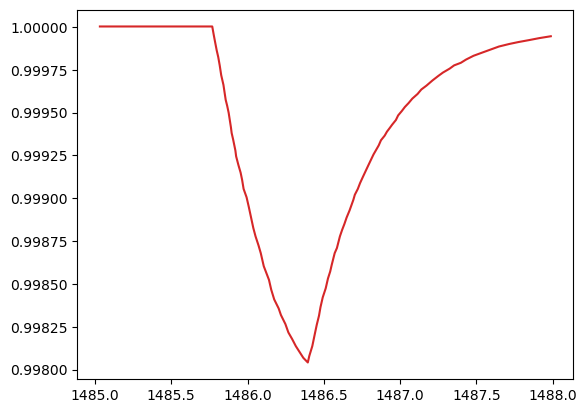

In [2]:
## Things to do:
# Load exocomet lc
data = np.genfromtxt('/scratch/abraham/Documents/mega_git/mega/data/random/raw/lc/15March2024_exocoment/15March2024_exocomet_lc.csv', delimiter=',')
x = data[:,0]
y = data[:,1]

fig,ax = plt.subplots(1,1,dpi=100)

ax.plot(x,y,color='tab:red')

plt.show()


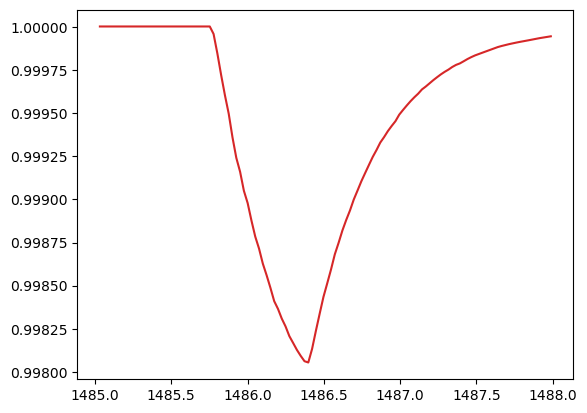

In [3]:
# Interpolate lc to 120 points
# Define the new x values with 120 points
new_x = np.linspace(x.min(), x.max(), 120)

# Interpolate y values corresponding to the new x values
new_y = np.interp(new_x, x, y)

fig,ax = plt.subplots(1,1,dpi=100)

ax.plot(new_x,new_y,color='tab:red')
# ax.plot(x,y,color='tab:blue')

plt.show()


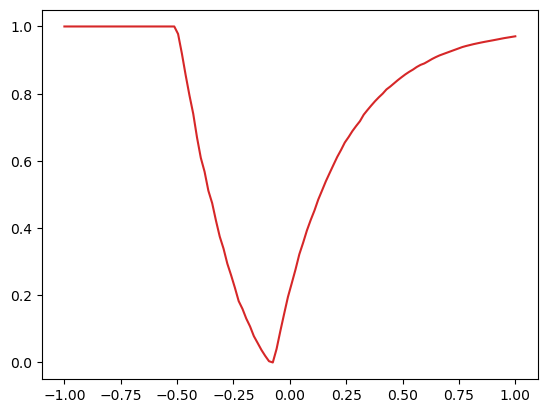

In [12]:
# Normalize the light curve
test_lc_scaled = (new_y - np.amin(new_y))/(np.amax(new_y) - np.amin(new_y))

fig,ax = plt.subplots(1,1,dpi=100)

ax.plot(np.linspace(-1,1,len(new_x)),test_lc_scaled,color='tab:red')
# ax.plot(x,y,color='tab:blue')

plt.show()


In [13]:
test_lc_scaled.shape

(120,)

In [14]:
test_lc_scaled = np.reshape(test_lc_scaled,(1,120))
test_lc_scaled.shape

(1, 120)

In [5]:
# Load the model
model_load = load_model("/scratch/abraham/Documents/mega_git/mega/ml_model/nov13_model1/nov13_model1_sample_interpolate_no_noise_unf_samplept_20to60.h5")


2024-03-15 11:48:06.654498: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1635] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 26166 MB memory:  -> device: 0, name: Tesla V100-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


In [15]:
# Predict the shape
# Test dataset - Prediciton
test_predict_shape = model_load.predict(test_lc_scaled)
test_predict_shape_normalized = np.zeros(test_predict_shape.shape)

test_predict_shape_normalized = (test_predict_shape - np.amin(test_predict_shape))/(np.amax(test_predict_shape) - np.amin(test_predict_shape))
print("Normalized the predicted shape")
test_predict_shape = test_predict_shape_normalized
del test_predict_shape_normalized

2024-03-15 11:51:14.723607: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:424] Loaded cuDNN version 8600


1/1 [==============================] - 13s 13s/step
Normalized the predicted shape


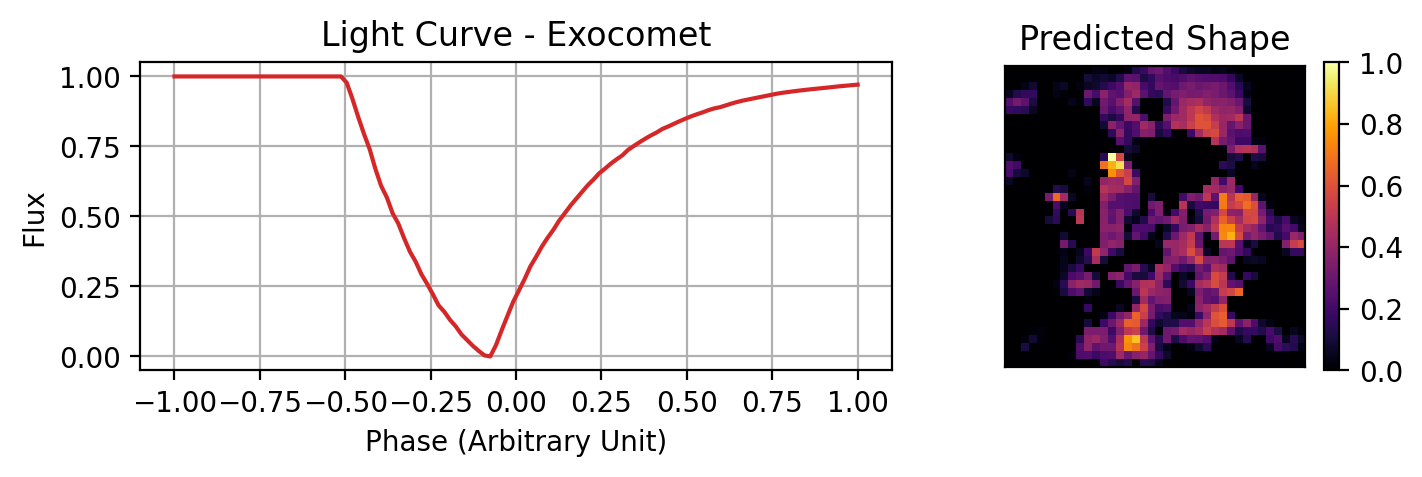

In [20]:
fig, axes = plt.subplots(1, 2, dpi=200, figsize=(8,2),gridspec_kw={'width_ratios': [2,1]})  # 1 row, 2 columns
ph = np.linspace(-1,1,len(test_lc_scaled[0]))

# Plot on each subplot
k = int(0) # Index
axes[0].set_title('Light Curve - Exocomet')
axes[0].plot(ph, test_lc_scaled[0], color='tab:red')
axes[0].grid('on')
axes[0].set_ylabel('Flux')
axes[0].set_xlabel('Phase (Arbitrary Unit)')


axes[1].set_title('Predicted Shape')
axes[1].tick_params(left = False, right = False , labelleft = False ,labelbottom = False, bottom = False)
img = axes[1].imshow(test_predict_shape[0,:,:],cmap='inferno')
plt.colorbar(img)

plt.show()
